# PREDICTION MODEL



## 1) Importing libraries and reading csv data


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

In [5]:
dataset = pd.read_csv('data_27092022.csv')

In [7]:
print("dimensions of dataset :",dataset.shape)

dimensions of dataset : (7899, 7)


In [9]:
dataset.head()


,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Unnamed: 6
0,27-06-2022,17:00:25,28.9,48.9,1168,0,NaN
1,27-06-2022,17:01:32,29.1,45.9,1150,0,NaN
2,27-06-2022,17:15:00,28.4,42.5,1141,0,NaN
3,27-06-2022,17:22:22,29.9,43.3,1138,0,NaN
4,27-06-2022,17:26:22,28.9,41.5,1135,0,NaN


## 2) Pre-Processing the Dataset

In [12]:
# removing an un-needed column "Unnamed: 6"

dataset = dataset.drop(['Unnamed: 6'], axis = 1)

In [14]:
dataset.head(5)

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status
0,27-06-2022,17:00:25,28.9,48.9,1168,0
1,27-06-2022,17:01:32,29.1,45.9,1150,0
2,27-06-2022,17:15:00,28.4,42.5,1141,0
3,27-06-2022,17:22:22,29.9,43.3,1138,0
4,27-06-2022,17:26:22,28.9,41.5,1135,0


In [16]:
# Checking for null values in the dataset

dataset.isnull().sum()

Location            0
Timestamp           0
Temperature         0
Humidity            0
CO2                 0
Occupancy status    0
dtype: int64

In [18]:
# Checking for the data-types in the data
 
dataset.dtypes


Location             object
Timestamp            object
Temperature         float64
Humidity            float64
CO2                   int64
Occupancy status      int64
dtype: object

In [20]:
dataset.describe()

,Temperature,Humidity,CO2,Occupancy status
count,7899.000000,7899.00000,7899.000000,7899.000000
mean,28.353690,69.13408,683.416255,0.425117
std,1.751652,11.94271,198.108790,0.494392
min,22.300000,37.20000,454.000000,0.000000
25%,27.300000,60.50000,541.000000,0.000000
50%,28.500000,73.40000,617.000000,0.000000
75%,29.500000,77.90000,776.000000,1.000000
max,32.900000,90.60000,2224.000000,1.000000


In [22]:
dataset.groupby('Occupancy status').mean(numeric_only=True)

,Temperature,Humidity,CO2
Occupancy status,,,
0,29.03094,73.965955,580.423255
1,27.43785,62.599970,822.692972


In [24]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status
0,27-06-2022,17:00:25,28.9,48.9,1168,0
1,27-06-2022,17:01:32,29.1,45.9,1150,0
2,27-06-2022,17:15:00,28.4,42.5,1141,0
3,27-06-2022,17:22:22,29.9,43.3,1138,0
4,27-06-2022,17:26:22,28.9,41.5,1135,0


In [26]:
def plot_df_merge_3(df, x1, y2, y3, y4, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(60,8))
    
    fig, ax1 = plt.subplots()
    
    
    ax1.set_xlabel('Date', fontsize = 15)
    ax1.set_ylabel('Temperature', color='tab:blue', fontsize = 15)
    ax1.plot(x1, y2, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax1.set_xticks(x1[::30])
    ax1.set_xticklabels(x1[::30], rotation=90, fontsize = 15)
    
    ax1.figure.set_figwidth(20)
    ax1.figure.set_figheight(5)
    
    ax2 = ax1.twinx()
    
    ax2.set_ylabel('CO2 Level', color='tab:green', fontsize = 15)  
    ax2.plot(x1, y3, color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    
    ax2.figure.set_figwidth(20)
    ax2.figure.set_figheight(5)
    
    
    ax3 = ax1.twinx()
    
    ax3.spines.right.set_position(("axes", 1.05))
    
#     new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
#     ax3.axis["right"] = new_fixed_axis(loc="right",
#                                     axes=ax3,
#                                     offset=(60, 0))
    
    ax3.set_ylabel('Humidity', color='tab:red', fontsize = 15)  
    ax3.plot(x1, y4, color='tab:red')
    ax3.tick_params(axis='y', labelcolor='tab:red')
    
    ax3.figure.set_figwidth(20)
    ax3.figure.set_figheight(5)
   
#     plt.plot(x1, y3, color='tab:green')
#     plt.plot(x1, y4, color='tab:red')

#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.figure().set_figwidth(210)
#     plt.figure().set_figheight(1)
#     plt.figure(figsize=(20,5))
    plt.plot()

In [28]:
def plot_df_merge_2(df, x1, y2, y3, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(30,8))
    plt.plot(x1, y2, color='tab:blue')
    plt.plot(x1, y3, color='tab:green')

    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [30]:
def plot_df(df, x1, y1, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('Date', fontsize = 15)
    ax1.set_ylabel('occupancy status', color='tab:blue', fontsize = 15)
    ax1.plot(x1, y1, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax1.set_xticks(x1[::30])
    ax1.set_xticklabels(x1[::30], rotation=90, fontsize = 12)
    
    ax1.figure.set_figwidth(20)
    ax1.figure.set_figheight(5)
    
    ax1.set_yticks(np.arange(0,4,1))
    plt.show()

In [32]:
dataset['exact_time'] = dataset['Location']+ ' ' + dataset['Timestamp']

In [34]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22


<Figure size 6000x800 with 0 Axes>

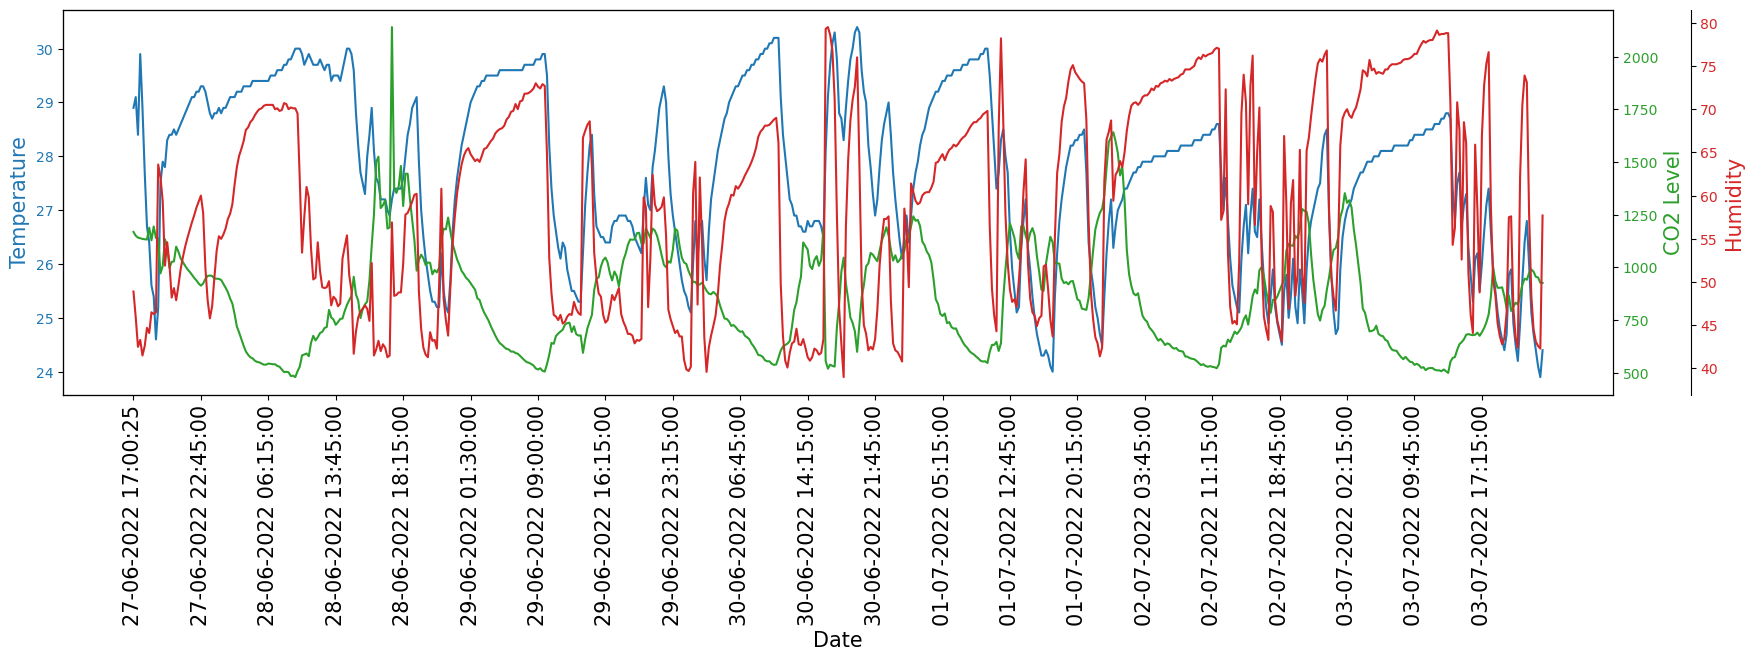

In [36]:
plot_df_merge_3(dataset, dataset['exact_time'][0:628], dataset['Temperature'][0:628], dataset['CO2'][0:628], dataset['Humidity'][0:628], "timestamp vs temperature", "timestamp", "Temperature in C*")

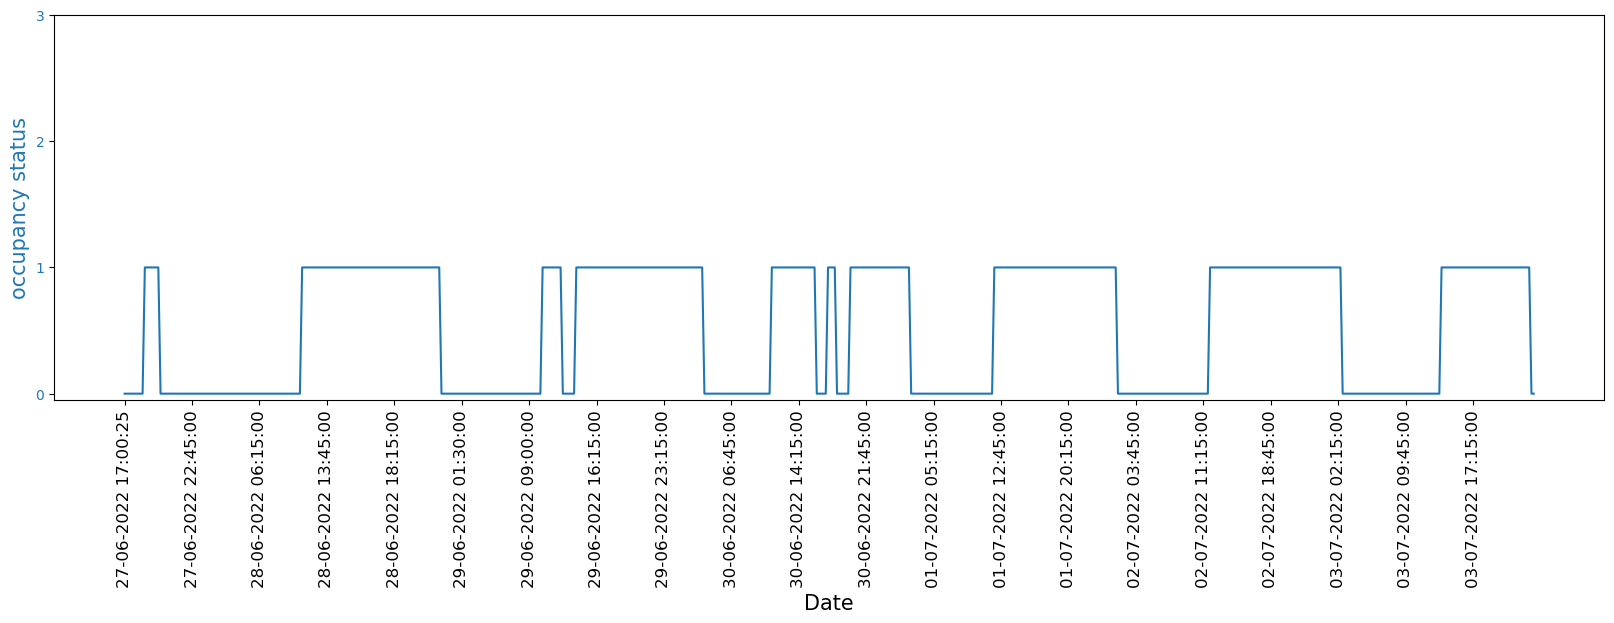

In [38]:
plot_df(dataset, dataset['exact_time'][0:628], dataset['Occupancy status'][0:628], "timestamp vs temperature", "timestamp", "Temperature in C*")

## timestamp vs temperature graph for 2 hours (27/06/22 - 17:00:25 ~ 27/06/22 - 19:00:00)

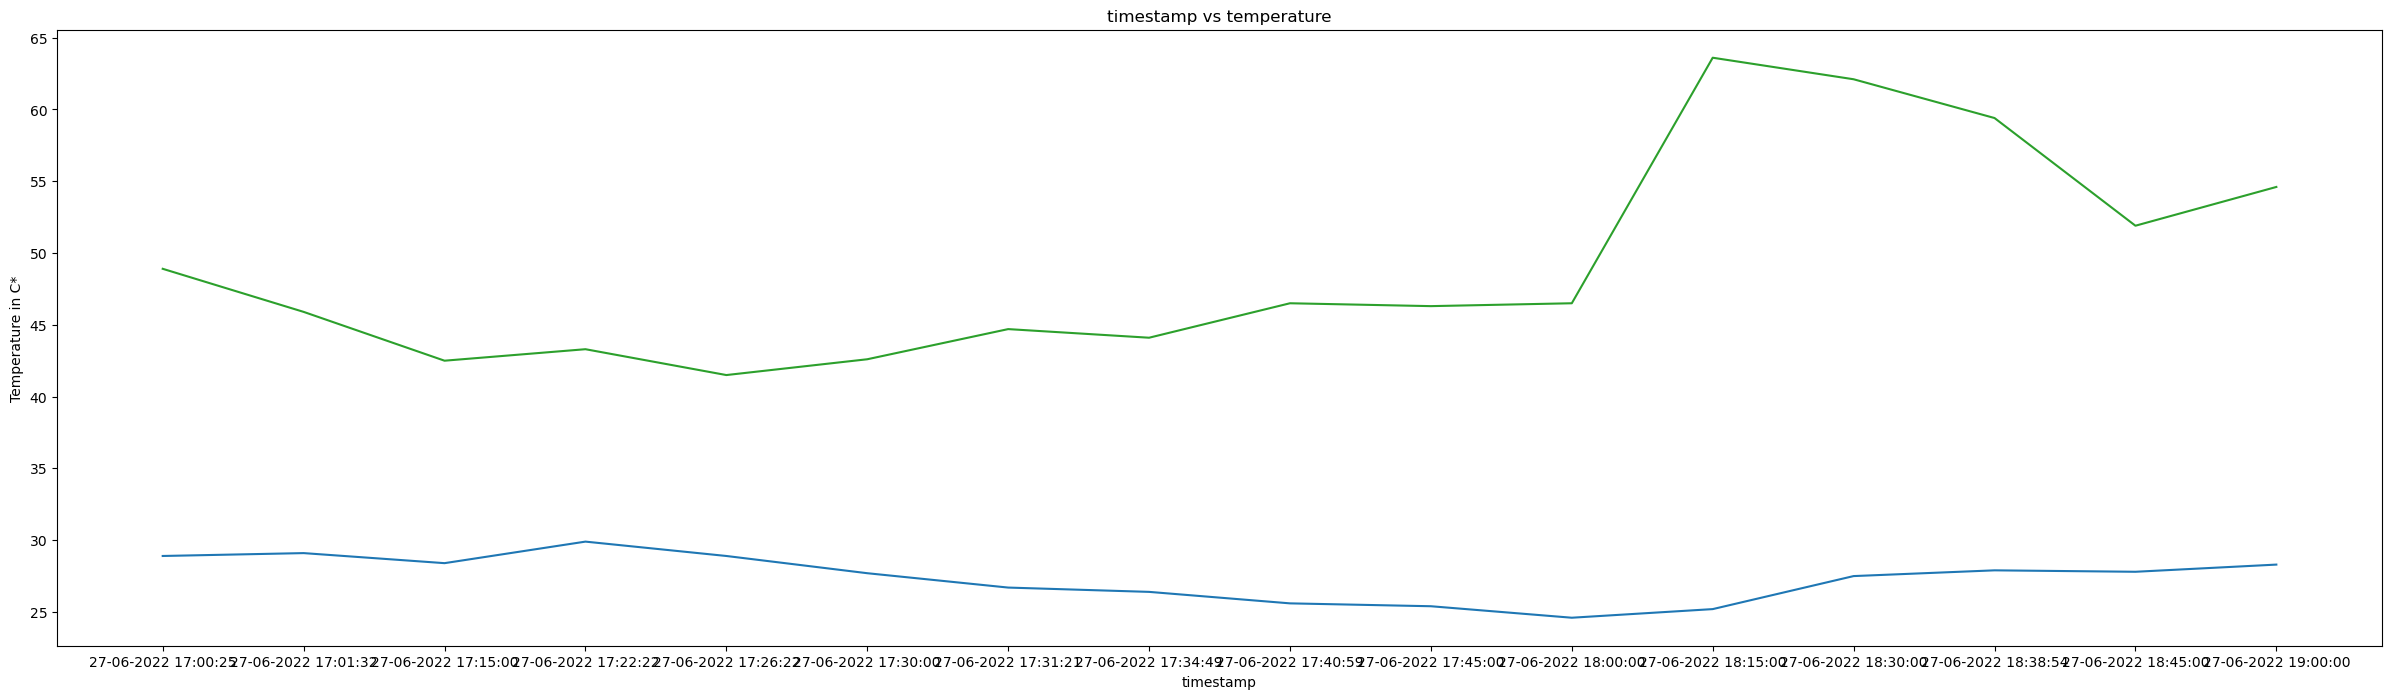

In [40]:
plot_df_merge_2(dataset, dataset['exact_time'][0:16], dataset['Temperature'][0:16], dataset['Humidity'][0:16], "timestamp vs temperature", "timestamp", "Temperature in C*")

<Figure size 6000x800 with 0 Axes>

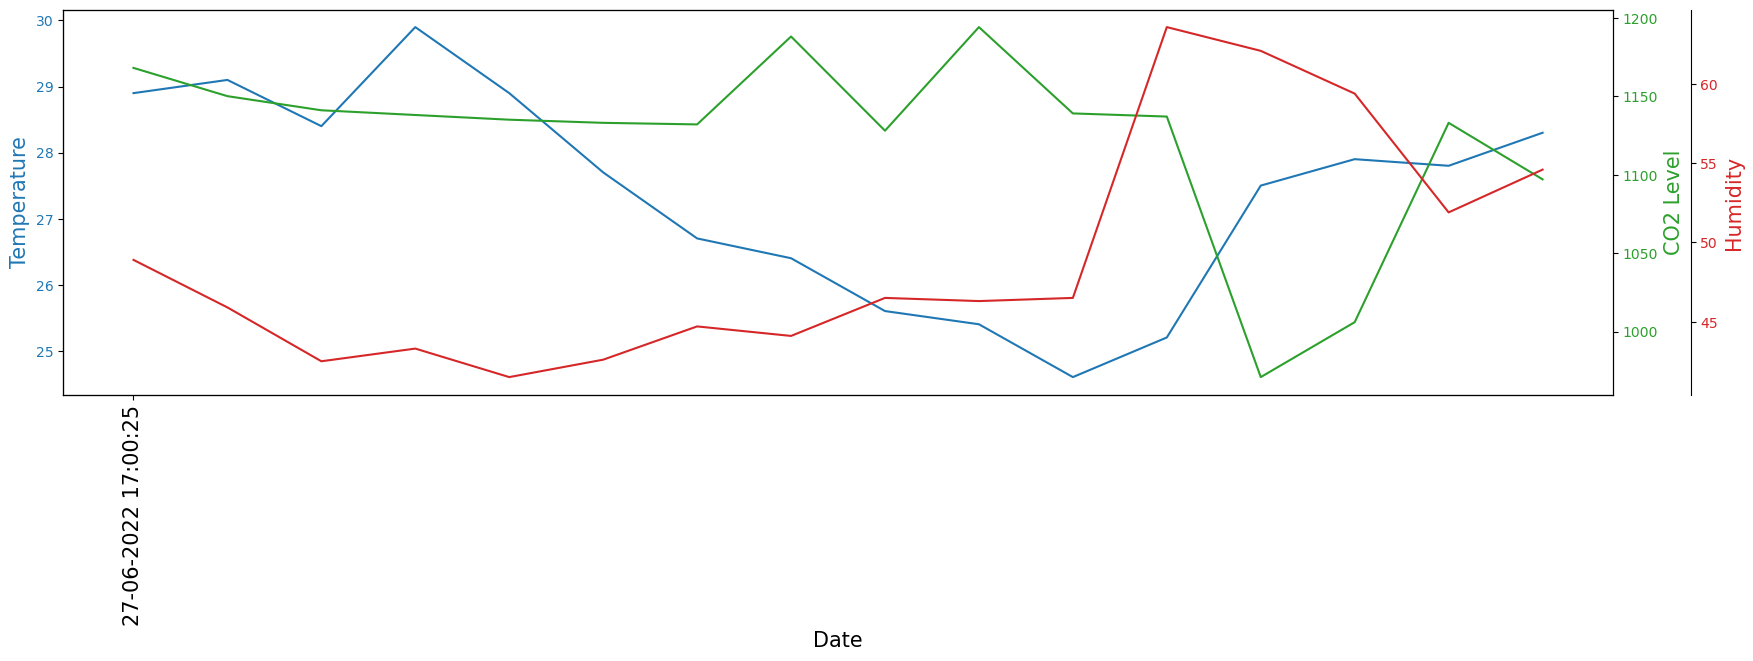

In [42]:
plot_df_merge_3(dataset, dataset['exact_time'][0:16], dataset['Temperature'][0:16], dataset['CO2'][0:16], dataset['Humidity'][0:16], "timestamp vs temperature", "timestamp", "Temperature in C*")

## timestamp vs temperature graph for 1 week (27/06/22 - 03/07/22)

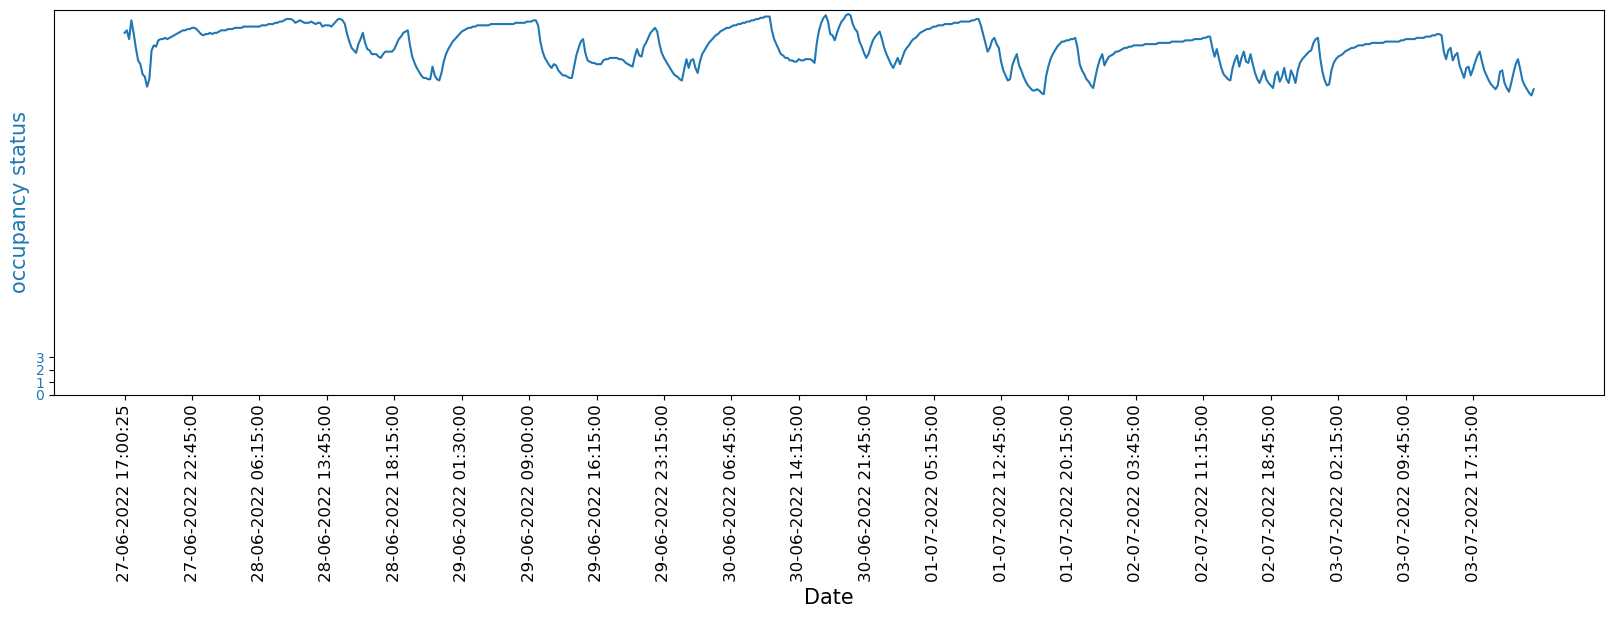

In [45]:
plot_df(dataset, dataset['exact_time'][0:628], dataset['Temperature'][0:628], "timestamp vs temperature", "timestamp", "Temperature in C*")

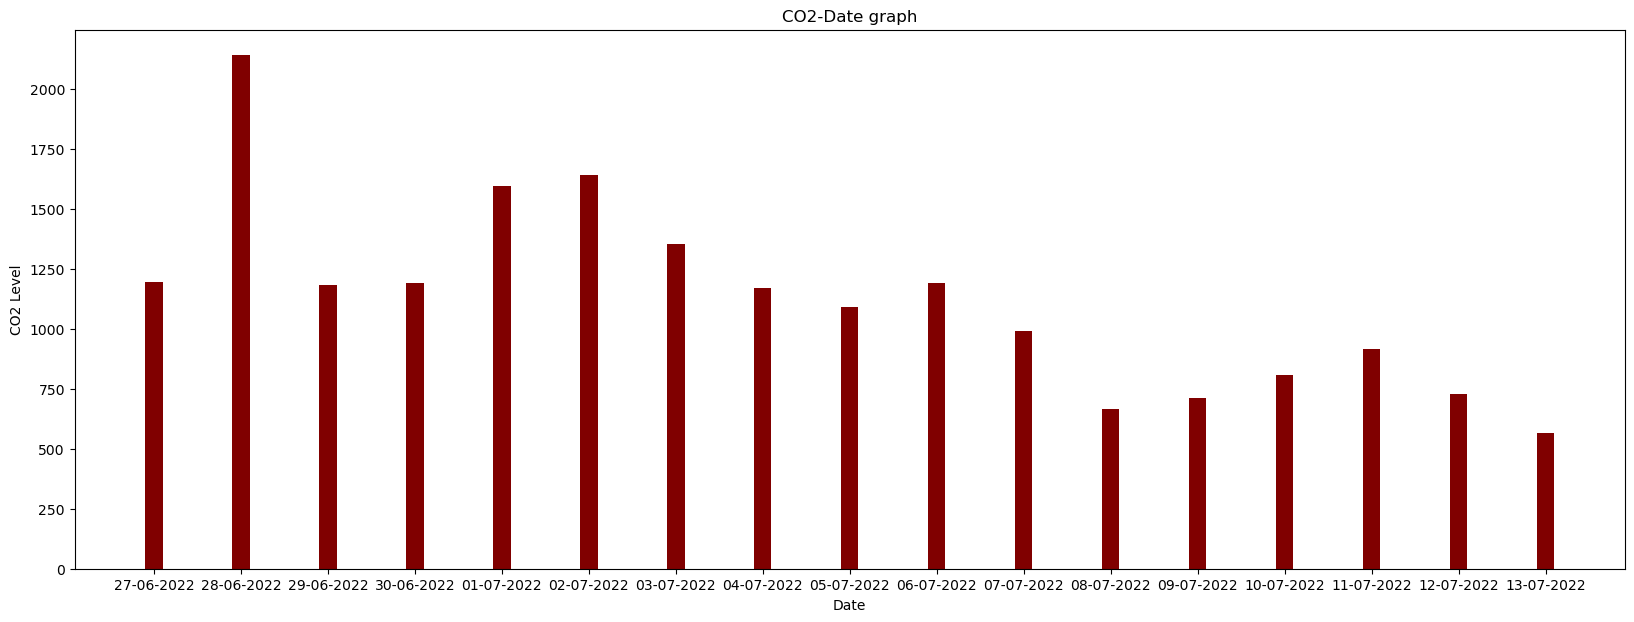

In [47]:
fig = plt.figure(figsize =(20, 7))
plt.bar(dataset['Location'].head(1500), dataset['CO2'].head(1500), color ='maroon',
        width = 0.2)
plt.xlabel("Date")
plt.ylabel("CO2 Level")
plt.title("CO2-Date graph")
plt.show()

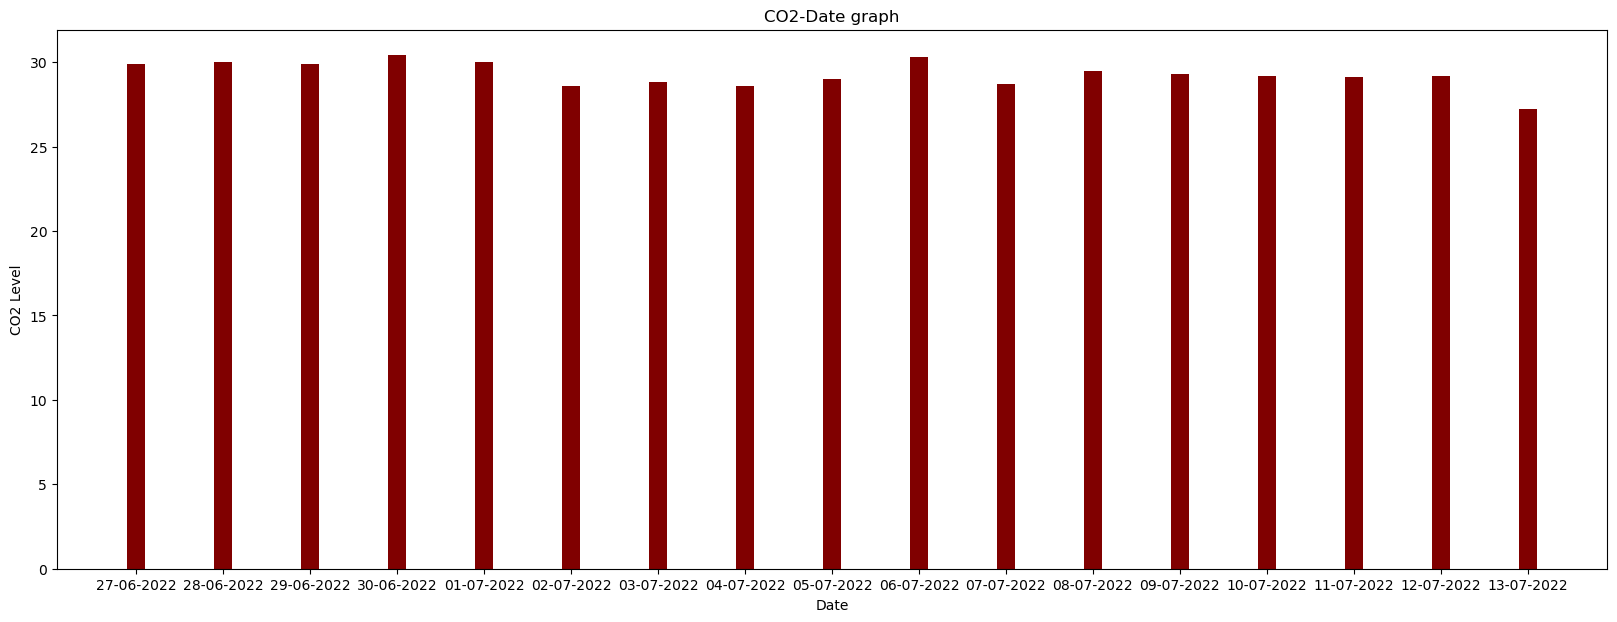

In [49]:
fig = plt.figure(figsize =(20, 7))
plt.bar(dataset['Location'].head(1500), dataset['Temperature'].head(1500), color ='maroon',
        width = 0.2)
plt.xlabel("Date")
plt.ylabel("CO2 Level")
plt.title("CO2-Date graph")
plt.show()

In [51]:
dataset.dtypes

Location             object
Timestamp            object
Temperature         float64
Humidity            float64
CO2                   int64
Occupancy status      int64
exact_time           object
dtype: object

In [53]:
print(type(dataset['exact_time']))

<class 'pandas.core.series.Series'>


In [55]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22


In [57]:
from datetime import datetime

In [61]:
dataset['exact_time_object'] = pd.to_datetime(
    dataset['exact_time'],
    dayfirst=True,
    format='%d-%m-%Y %H:%M:%S'
)

In [63]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22


In [65]:
print(type(dataset['exact_time_object']))

<class 'pandas.core.series.Series'>


In [67]:
print(type(dataset['Timestamp']))

<class 'pandas.core.series.Series'>


In [69]:
x = dataset['Timestamp'][0]

In [71]:
x

'17:00:25'

In [73]:
 y = x[0:2]  + x[3:5]+ x[6:8]

In [75]:
print(type(int(y)))

<class 'int'>


In [77]:
print(y)

170025


In [79]:
def convert_timestamp_to_numeric(timestamp_string):
    new_string = timestamp_string[0:2]  + timestamp_string[3:5]+ timestamp_string[6:8]
    new_string = int(new_string)
    return new_string

In [81]:
z = convert_timestamp_to_numeric(x)
print(type(z))

<class 'int'>


In [83]:
dataset['Timestamp_numeric'] = dataset['Timestamp'].apply(convert_timestamp_to_numeric)


In [85]:
print(type(dataset['Timestamp_numeric']))

<class 'pandas.core.series.Series'>


In [87]:
dataset.dtypes


Location                     object
Timestamp                    object
Temperature                 float64
Humidity                    float64
CO2                           int64
Occupancy status              int64
exact_time                   object
exact_time_object    datetime64[ns]
Timestamp_numeric             int64
dtype: object

In [89]:
dataset.head(600)

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object,Timestamp_numeric
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25,170025
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32,170132
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00,171500
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22,172222
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22,172622
...,...,...,...,...,...,...,...,...,...
595,03-07-2022,16:00:00,25.8,46.2,680,1,03-07-2022 16:00:00,2022-07-03 16:00:00,160000
596,03-07-2022,16:15:00,25.3,44.1,678,1,03-07-2022 16:15:00,2022-07-03 16:15:00,161500
597,03-07-2022,16:30:00,26.1,65.9,680,1,03-07-2022 16:30:00,2022-07-03 16:30:00,163000
598,03-07-2022,16:45:00,26.2,58.4,690,1,03-07-2022 16:45:00,2022-07-03 16:45:00,164500


In [91]:
xx = dataset['Location'][595]
print(xx)

03-07-2022


In [93]:
def create_week_status(location_value):
    
    list_of_07 = [2,3,9,10,16,17,23,24,30,31]
    list_of_08 = [6,7,13,14,20,21,27,28]
    list_of_09 = [3,4,10,11,17,18,24,25]
    
    if int(location_value[3:5]) == 6:
        return 1
    
    elif int(location_value[3:5]) == 7:
        if int(location_value[0:2]) in list_of_07:
            return 0
        else:
            return 1
    
    elif int(location_value[3:5]) == 8:
        if int(location_value[0:2]) in list_of_08:
            return 0
        else:
            return 1
        
    elif int(location_value[3:5]) == 9:
        if int(location_value[0:2]) in list_of_09:
            return 0
        else:
            return 1


In [95]:
create_week_status(xx)

0

In [97]:
dataset['week_status'] = dataset['Location'].apply(create_week_status)


In [99]:
dataset.head(500)

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object,Timestamp_numeric,week_status
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25,170025,1
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32,170132,1
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00,171500,1
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22,172222,1
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22,172622,1
...,...,...,...,...,...,...,...,...,...,...
495,02-07-2022,15:00:00,27.1,70.8,772,1,02-07-2022 15:00:00,2022-07-02 15:00:00,150000,0
496,02-07-2022,15:15:00,26.2,59.0,728,1,02-07-2022 15:15:00,2022-07-02 15:15:00,151500,0
497,02-07-2022,15:30:00,26.9,72.7,792,1,02-07-2022 15:30:00,2022-07-02 15:30:00,153000,0
498,02-07-2022,15:45:00,27.4,76.2,863,1,02-07-2022 15:45:00,2022-07-02 15:45:00,154500,0


## 3) Defining attributes & splitting the data into TRAINING & TESTING set

In [102]:
X = dataset.drop(['Occupancy status', 'Location', 'Timestamp' , 'exact_time_object', 'exact_time'], axis = 1)
y = dataset['Occupancy status']


# x = features
# y = target

In [104]:
X.head(20)

,Temperature,Humidity,CO2,Timestamp_numeric,week_status
0,28.9,48.9,1168,170025,1
1,29.1,45.9,1150,170132,1
2,28.4,42.5,1141,171500,1
3,29.9,43.3,1138,172222,1
4,28.9,41.5,1135,172622,1
5,27.7,42.6,1133,173000,1
6,26.7,44.7,1132,173121,1
7,26.4,44.1,1188,173449,1
8,25.6,46.5,1128,174059,1
9,25.4,46.3,1194,174500,1


In [106]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Occupancy status, dtype: int64

In [108]:
X.shape

(7899, 5)

In [110]:
y.shape


(7899,)

In [112]:
# splitting the data to train and test

from sklearn.model_selection import train_test_split

training_data_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = training_data_ratio, random_state = 29 )

# Using new dataset to plot the true vs predicted values 

In [114]:
# dataset_t_p = pd.read_csv('data_27092022.csv')

In [117]:
# dataset_t_p.head()

In [ ]:
# dataset_t_p = dataset_t_p.drop(['Unnamed: 6'], axis = 1)


In [ ]:
# dataset_t_p.head()

In [ ]:
# dataset_t_p['week_status'] = dataset_t_p['Location'].apply(create_week_status)


In [ ]:
# dataset_t_p.head()

In [ ]:
# dataset_t_p['Timestamp_numeric'] = dataset_t_p['Timestamp'].apply(convert_timestamp_to_numeric)

In [ ]:
# dataset_t_p.head()

In [ ]:
# dataset_t_p['exact_time'] = dataset_t_p['Location']+ ' ' + dataset_t_p['Timestamp']

In [ ]:
# dataset_t_p.head()

In [ ]:
# X_tp = dataset_t_p.drop(['Occupancy status', 'Location', 'Timestamp'], axis = 1)
# y_tp = dataset_t_p['Occupancy status']

In [ ]:
# training_data_ratio = 0.8
# X_train_tp, X_test_tp, y_train_tp, y_test_tp = train_test_split (X, y, train_size = training_data_ratio)

In [ ]:
# def plot_df_merge_2(df, x1, y2, y3, y4, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
#     plt.figure(figsize=(60,8))
    
#     fig, ax1 = plt.subplots()
    
#     ax1.set_xlabel('Date')
#     ax1.set_ylabel('True Value', color='tab:blue')
#     ax1.plot(x1, y2, color='tab:blue')
#     ax1.tick_params(axis='y', labelcolor='tab:blue')
    
#     ax1.set_xticks(x1[::30])
#     ax1.set_xticklabels(x1[::30], rotation=90)
    
#     ax1.figure.set_figwidth(20)
#     ax1.figure.set_figheight(5)
    
#     ax1.set_yticks(np.arange(0,4,1))
    
#     ax2 = ax1.twinx()
    
#     ax2.set_ylabel('Predicted Value', color='tab:green')  
#     ax2.plot(x1, y3, color='tab:green')
#     ax2.tick_params(axis='y', labelcolor='tab:green')
    
#     ax2.figure.set_figwidth(20)
#     ax2.figure.set_figheight(5)
    
#     ax2.set_yticks(np.arange(0,4,1))

# #     plt.plot(x1, y3, color='tab:green')
# #     plt.plot(x1, y4, color='tab:red')

# #     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
# #     plt.figure().set_figwidth(210)
# #     plt.figure().set_figheight(1)
# #     plt.figure(figsize=(20,5))
#     plt.plot()

## Method 1: Decision Trees

In [119]:
# load decision tree
from sklearn.tree import DecisionTreeClassifier


start_time = time.time()
# initialize the model
dtc = DecisionTreeClassifier()

# fit the model to the training data
dtc.fit(X_train, y_train)

end_time = time.time()

print("Time taken for execution", (end_time - start_time), "seconds")




Time taken for execution 0.013785600662231445 seconds


In [121]:
# accuracy score for training
acc_dtc = dtc.score(X_train, y_train) * 100

print(f"Decision Tree Train Accuracy {round(acc_dtc, 2)}%")

Decision Tree Train Accuracy 100.0%


In [123]:
# predict the response for the test dataset
y_pred_dtc = dtc.predict(X_test)



In [125]:
# print accuracy_score for the testing
from sklearn.metrics import accuracy_score

acc_dtc_test = accuracy_score(y_test, y_pred_dtc) * 100

print(f"Decision Tree Test Accuracy {round(acc_dtc_test, 2)}%")


Decision Tree Test Accuracy 91.33%


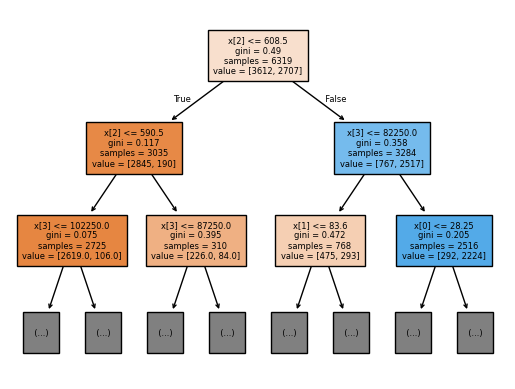

<Figure size 1200x1200 with 0 Axes>

In [127]:
from sklearn.tree import plot_tree

plot_tree(dtc, fontsize=6, max_depth = 2, filled=True)

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plt.show()

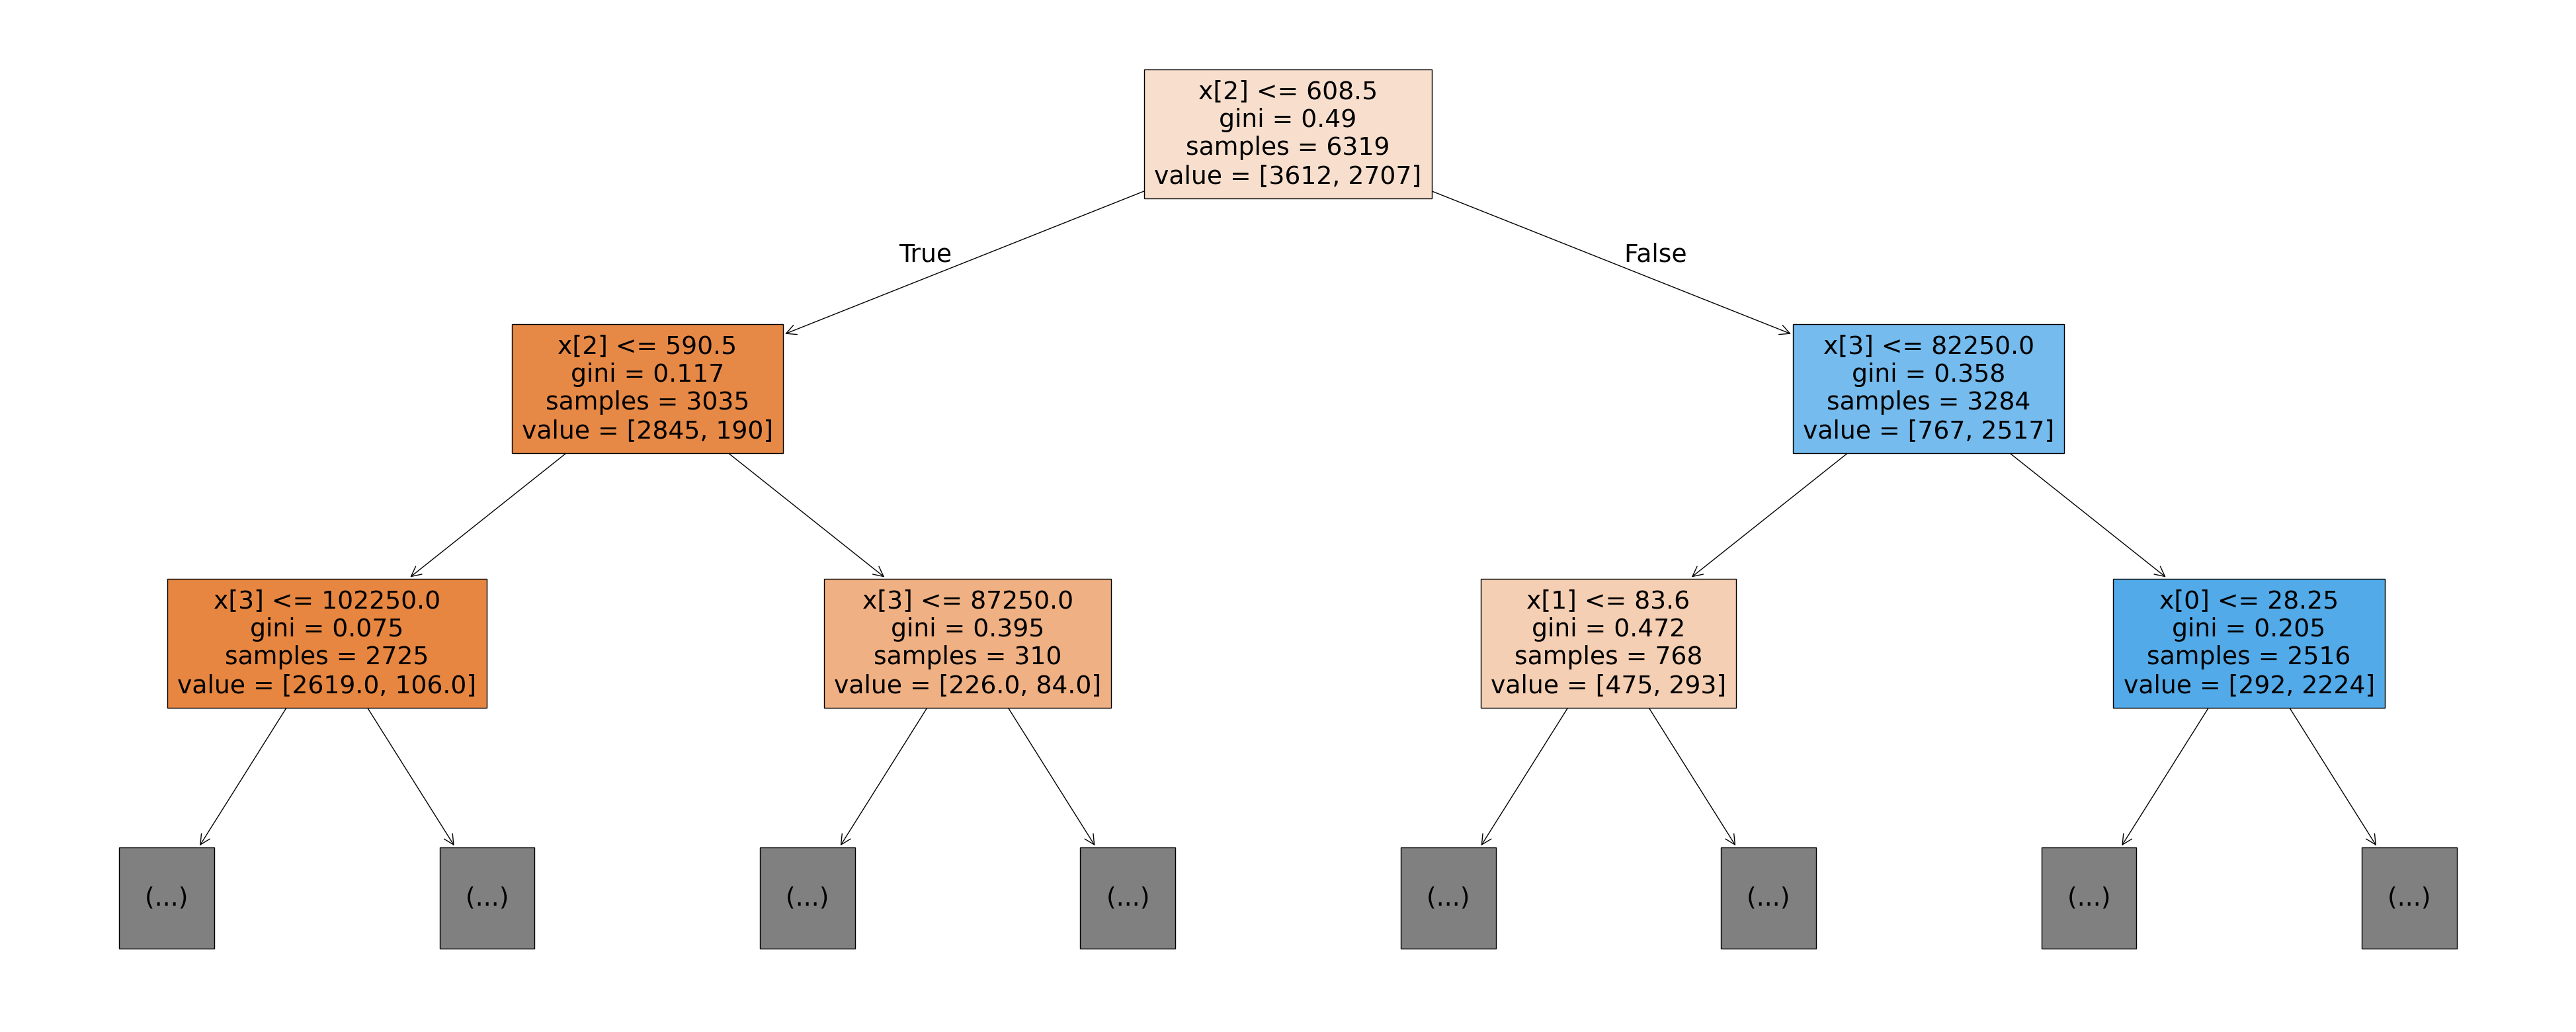

In [129]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(50,20)) # Resize figure
plot_tree(dtc, max_depth = 2 ,filled=True, ax=ax)
plt.show()


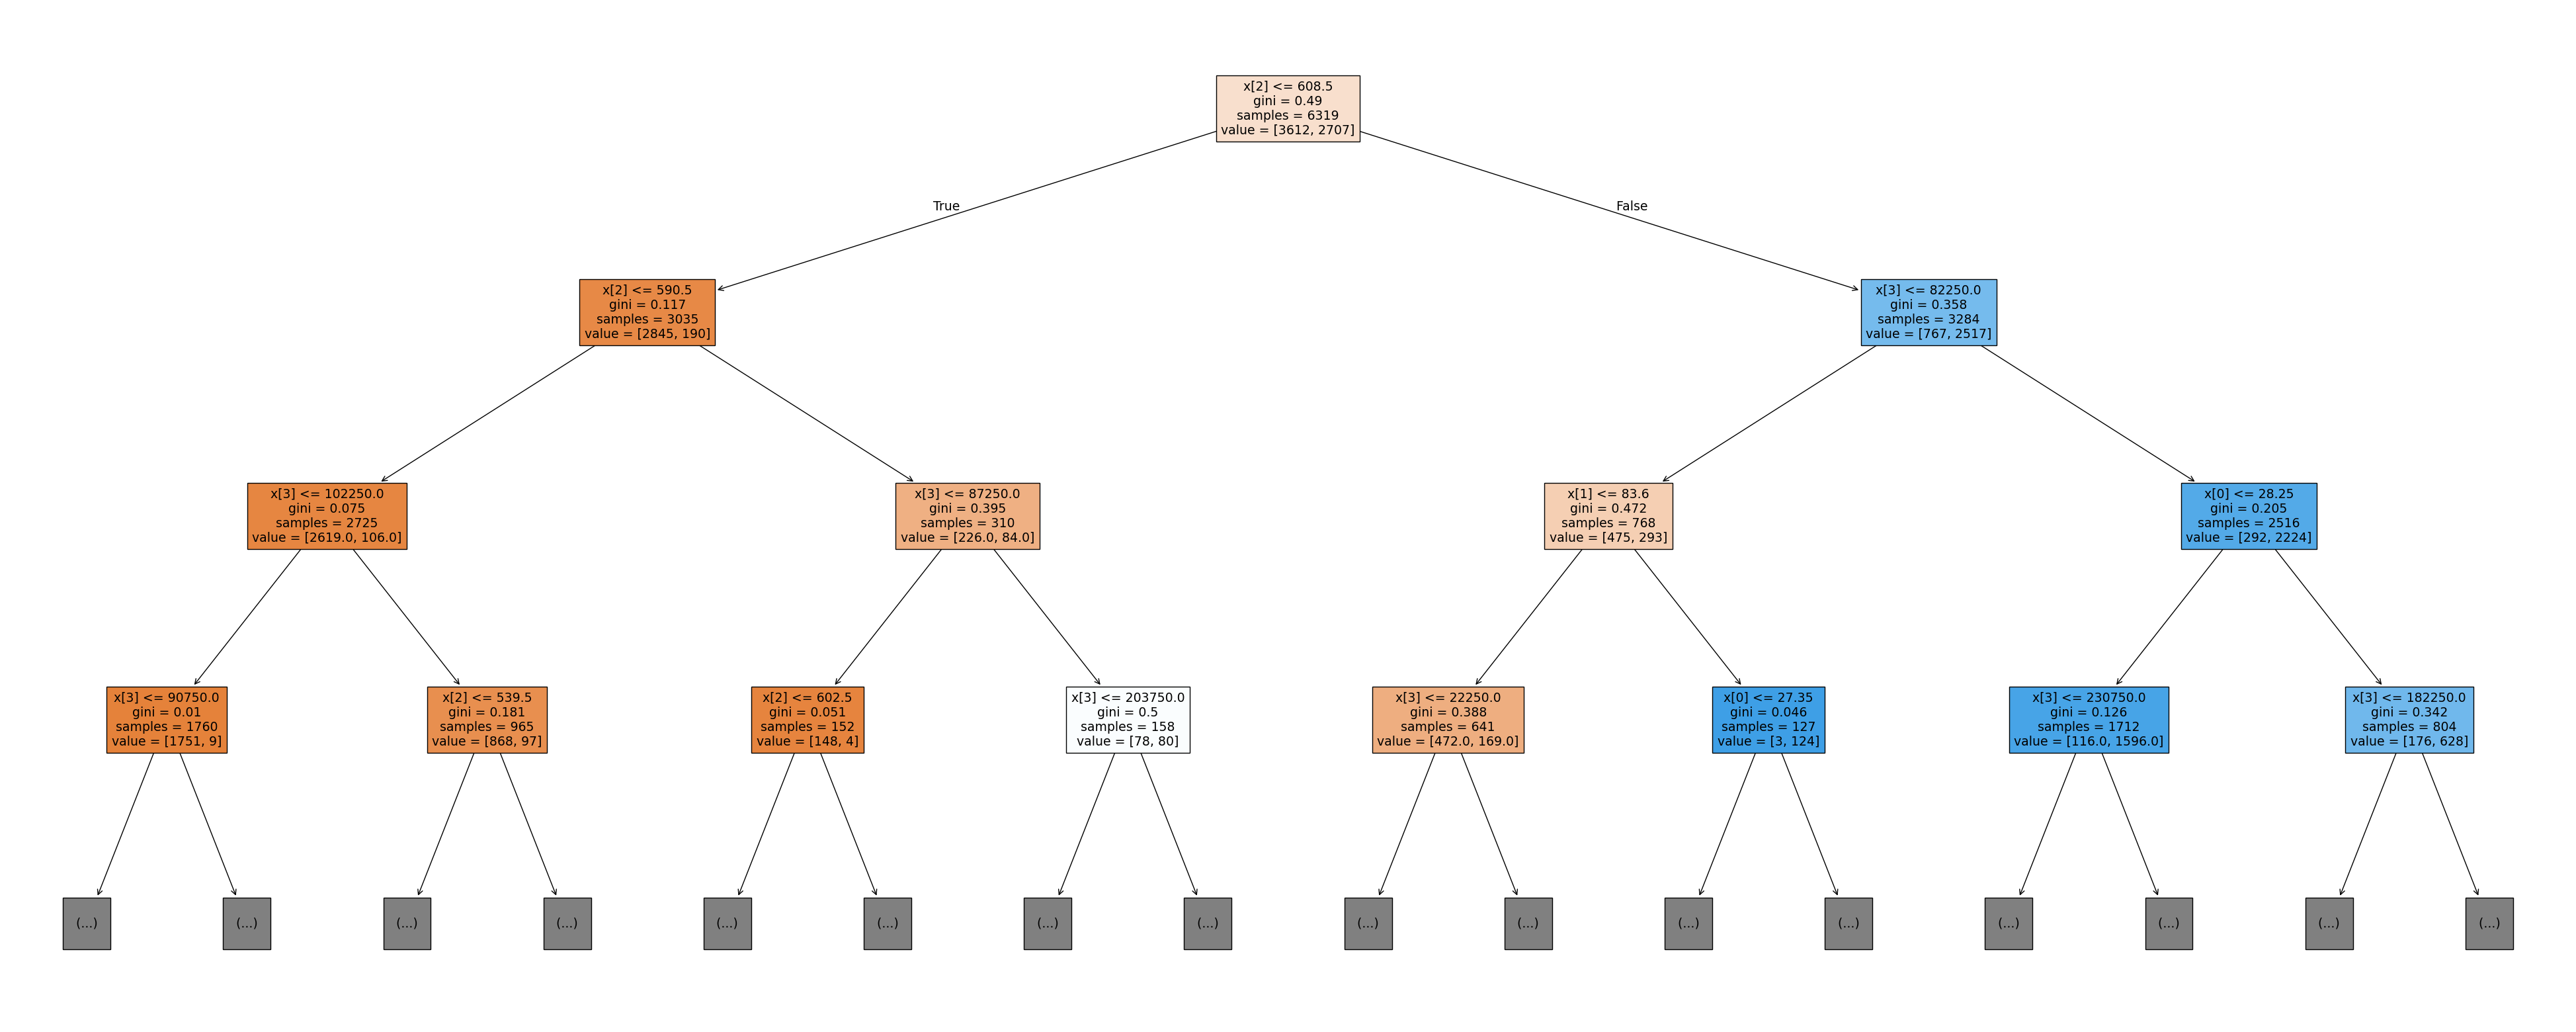

In [131]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(50,20)) # Resize figure
plot_tree(dtc, max_depth = 3 ,filled=True, ax=ax)
plt.show()


## METRICS -> Confusion Metrics, MAE, RMSE

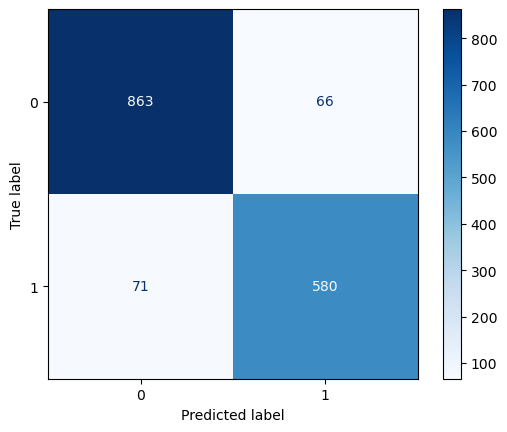

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, dtc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [138]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_dtc))

Mean Absolute Error:

0.08670886075949367


In [140]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_dtc)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.29446368326076083


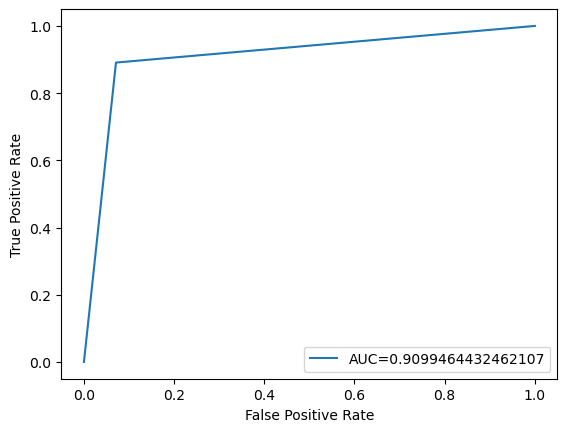

In [142]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_dtc)

auc = roc_auc_score(y_test, y_pred_dtc)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

In [144]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [146]:
# y_pred_dtc_tp = dtc.predict(X_test_tp)

# dataset_t_p.shape

In [148]:
# print(y_pred_dtc_tp)


# dataset_t_p['y_pred_dtc_tp'] = y_pred_dtc_tp

In [150]:
# plot_df_merge_3(dataset, dataset['exact_time'], dataset['Occupancy status'], y_pred_dtc_tp, "timestamp vs temperature", "timestamp", "Temperature in C*")

## Method 2: Support Vector Machine (RBF)

In [153]:
from sklearn.svm import SVC

start_time = time.time()

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

end_time = time.time()

print("Time taken for execution", (end_time - start_time), "seconds")


Time taken for execution 0.8422577381134033 seconds


In [155]:
# accuracy score for training
acc_svc = svclassifier.score(X_train, y_train) * 100

print(f"SVM Train Accuracy {round(acc_svc, 2)}%")

SVM Train Accuracy 74.05%


In [157]:
# predict the response for the test dataset
y_pred_svm = svclassifier.predict(X_test)

acc_svm_test = accuracy_score(y_test, y_pred_svm) * 100

print(f"SVM (rbf) Accuracy {round(acc_svm_test, 2)}%")


SVM (rbf) Accuracy 73.29%


In [159]:
(svclassifier.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

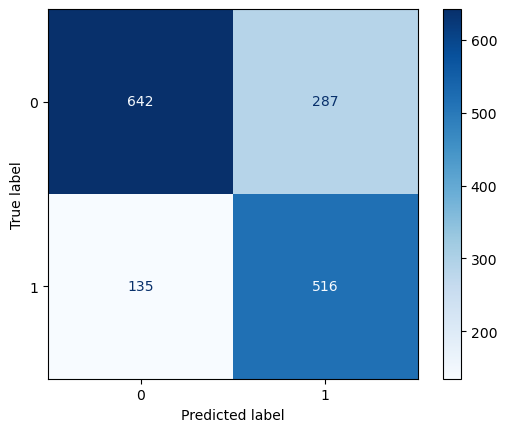

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, svclassifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [165]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_svm))

Mean Absolute Error:

0.2670886075949367


In [167]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_svm)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.5168061605620977


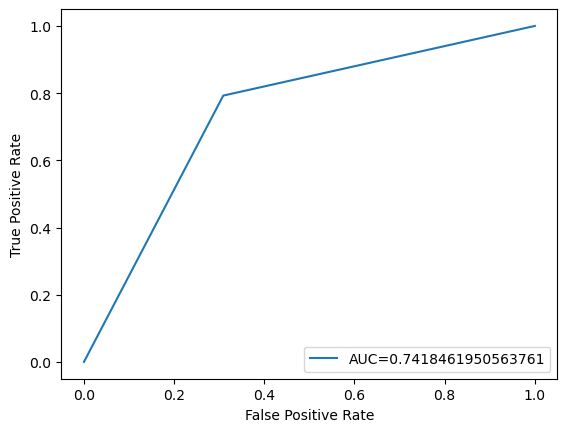

In [169]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_svm)

auc = roc_auc_score(y_test, y_pred_svm)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 2: Support Vector Machine (sigmoid)

In [172]:
start_time = time.time()

svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

end_time = time.time()

print("Time taken for execution", (end_time - start_time), "seconds")

Time taken for execution 0.42394328117370605 seconds


In [174]:
# accuracy score for training
acc_svc = svclassifier.score(X_train, y_train) * 100

print(f"SVM Train Accuracy {round(acc_svc, 2)}%")

SVM Train Accuracy 68.75%


In [176]:
svclassifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [178]:
# predict the response for the test dataset
y_pred_svm = svclassifier.predict(X_test)

acc_svm_test = accuracy_score(y_test, y_pred_svm) * 100

print(f"svm (sigmoid) Accuracy {round(acc_svm_test, 2)}%")


svm (sigmoid) Accuracy 68.86%


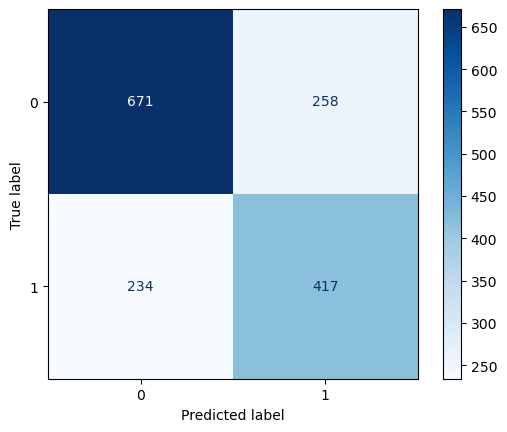

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, svclassifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [184]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_svm))

Mean Absolute Error:

0.31139240506329113


In [186]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_svm)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.5580254519852039


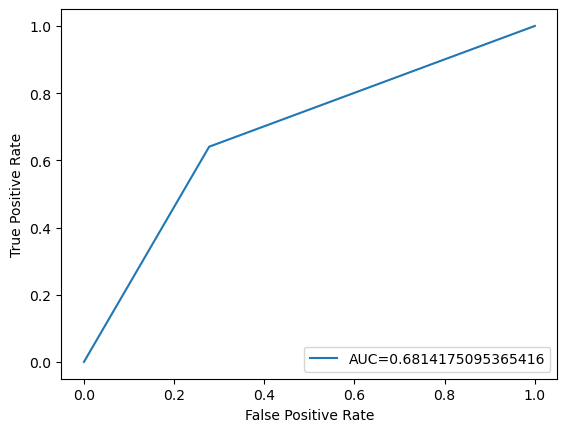

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_svm)

auc = roc_auc_score(y_test, y_pred_svm)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 2: Support Vector Machine (poly)

In [191]:
start_time = time.time()

svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)

end_time = time.time()

print("Time taken for execution", (end_time - start_time), "seconds")

Time taken for execution 0.8685793876647949 seconds


In [193]:
# accuracy score for training
acc_svc = svclassifier.score(X_train, y_train) * 100

print(f"SVM Train Accuracy {round(acc_svc, 2)}%")

SVM Train Accuracy 68.63%


In [195]:
svclassifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [197]:
# predict the response for the test dataset
y_pred_svm = svclassifier.predict(X_test)

acc_svm_test = accuracy_score(y_test, y_pred_svm) * 100

print(f"svm (poly) Accuracy {round(acc_svm_test, 2)}%")


svm (poly) Accuracy 68.73%


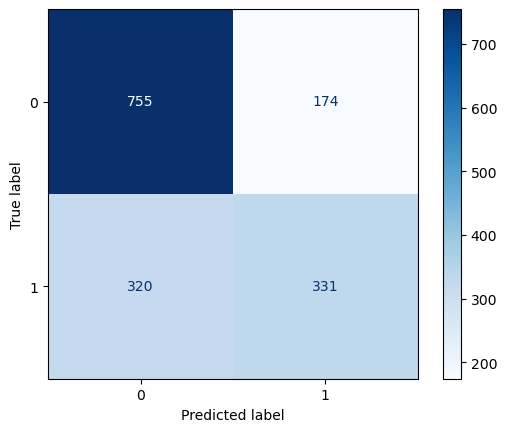

In [205]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, svclassifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [207]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_svm))

Mean Absolute Error:

0.31265822784810127


In [209]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_svm)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.559158499754856


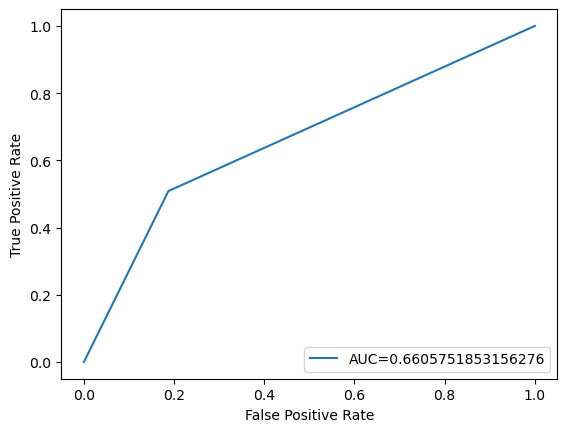

In [211]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_svm)

auc = roc_auc_score(y_test, y_pred_svm)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 3: Boosting (AdaBoost)

In [214]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    
    start_time = time.time()
    
    clf = AdaBoostClassifier(n_estimators=1000, random_state=0, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    
    # accuracy score for training
    acc_adaBoost = clf.score(X_train, y_train) * 100

    print(f"AdaBoost Train Accuracy {round(acc_adaBoost, 2)}%")
    
    # predict the response for the test dataset
    y_pred_adaBoost = clf.predict(X_test)

    acc_adaBoost_test = accuracy_score(y_test, y_pred_adaBoost) * 100

    print(f"AdaBoost Test Accuracy {round(acc_adaBoost_test, 2)}%")
    
    end_time = time.time()

    print("Time taken for execution", (end_time - start_time), "seconds")
    
    print('-----------------------------------------------------------------------------')

    
    

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 90.62%
AdaBoost Test Accuracy 88.35%
Time taken for execution 3.307854413986206 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 90.63%
AdaBoost Test Accuracy 88.61%
Time taken for execution 3.309208393096924 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 90.9%
AdaBoost Test Accuracy 88.61%
Time taken for execution 3.3363759517669678 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 91.01%
AdaBoost Test Accuracy 88.8%
Time taken for execution 3.30644154548645 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 91.17%
AdaBoost Test Accuracy 88.86%
Time taken for execution 3.278696298599243 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 91.34%
AdaBoost Test Accuracy 88.99%
Time taken for execution 3.434675455093384 seconds
-----------------------------------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Train Accuracy 91.44%
AdaBoost Test Accuracy 88.48%
Time taken for execution 3.3305532932281494 seconds
-----------------------------------------------------------------------------


In [216]:
# The best test accuracy is at alpha = 0.05, so finally !

# start_time = time.time()

clf = AdaBoostClassifier(n_estimators=1000, random_state=0, learning_rate=0.75)
clf.fit(X_train, y_train)

# end_time = time.time()
# print("Time taken for execution", (end_time - start_time), "seconds")


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.75, n_estimators=1000, random_state=0)

In [217]:
clf.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 0.75,
 'n_estimators': 1000,
 'random_state': 0}

In [220]:
# accuracy score for training
acc_adaBoost = clf.score(X_train, y_train) * 100

print(f"AdaBoost Train Accuracy {round(acc_adaBoost, 2)}%")

AdaBoost Train Accuracy 91.34%


In [222]:
# predict the response for the test dataset
y_pred_adaBoost = clf.predict(X_test)

acc_adaBoost_test = accuracy_score(y_test, y_pred_adaBoost) * 100

print(f"AdaBoost Test Accuracy {round(acc_adaBoost_test, 2)}%")


AdaBoost Test Accuracy 88.99%


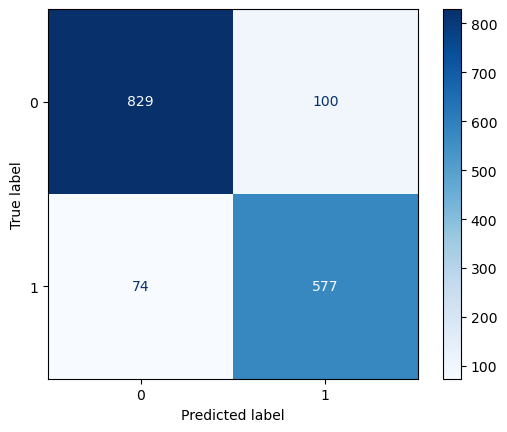

In [226]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [228]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_adaBoost))

Mean Absolute Error:

0.11012658227848102


In [230]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_adaBoost)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.3318532541327281


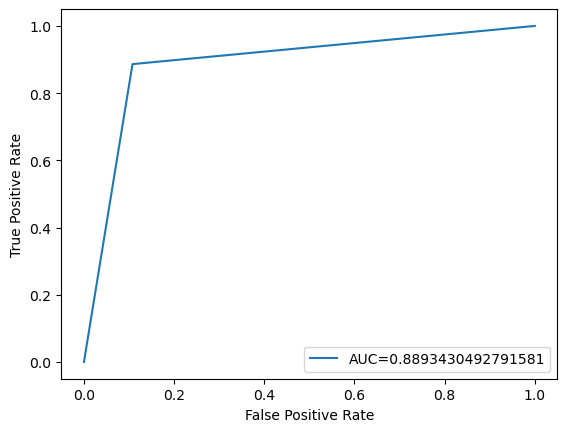

In [232]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_adaBoost)

auc = roc_auc_score(y_test, y_pred_adaBoost)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 3: Boosting (Gradient Boosting)

In [235]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    
    start_time = time.time()
    
    gb_clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=learning_rate, max_features=5, max_depth=10, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    acc_gb = gb_clf.score(X_train, y_train) * 100
    
    print('alpha', '=', learning_rate)

    print(f"Gradient Boost Train Accuracy {round(acc_gb, 2)}%")
    
    y_pred_gradient_Boost = gb_clf.predict(X_test)

    acc_gradient_Boost_test = accuracy_score(y_test, y_pred_gradient_Boost) * 100

    print(f"Gradient Boost Test Accuracy {round(acc_gradient_Boost_test, 2)}%")
    
    end_time = time.time()
    print("Time taken for execution", (end_time - start_time), "seconds")

    
    

    print('-----------------------------------------------------------------------------')


alpha = 0.05
Gradient Boost Train Accuracy 100.0%
Gradient Boost Test Accuracy 94.24%
Time taken for execution 29.928502559661865 seconds
-----------------------------------------------------------------------------
alpha = 0.075
Gradient Boost Train Accuracy 100.0%
Gradient Boost Test Accuracy 94.37%
Time taken for execution 20.662315368652344 seconds
-----------------------------------------------------------------------------
alpha = 0.1
Gradient Boost Train Accuracy 100.0%
Gradient Boost Test Accuracy 94.3%
Time taken for execution 16.5041024684906 seconds
-----------------------------------------------------------------------------
alpha = 0.25
Gradient Boost Train Accuracy 100.0%
Gradient Boost Test Accuracy 94.3%
Time taken for execution 8.525372743606567 seconds
-----------------------------------------------------------------------------
alpha = 0.5
Gradient Boost Train Accuracy 100.0%
Gradient Boost Test Accuracy 94.11%
Time taken for execution 5.862798690795898 seconds
-----

In [237]:
# max test accuracy at:

# n_estimators = 5000
# alpha = 0.075

# So, finally:
start_time = time.time()

gb_clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.1, max_features=5, max_depth=10, random_state=0)
gb_clf.fit(X_train, y_train)

end_time = time.time()
print("Time taken for execution", (end_time - start_time), "seconds")


Time taken for execution 16.340801239013672 seconds


In [239]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 10,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [241]:
acc_gb = gb_clf.score(X_train, y_train) * 100

print(f"Gradient Boost Train Accuracy {round(acc_gb, 2)}%")

Gradient Boost Train Accuracy 100.0%


In [243]:
y_pred_gradient_Boost = gb_clf.predict(X_test)

acc_gradient_Boost_test = accuracy_score(y_test, y_pred_gradient_Boost) * 100

print(f"Gradient Boost Test Accuracy {round(acc_gradient_Boost_test, 2)}%")

Gradient Boost Test Accuracy 94.3%


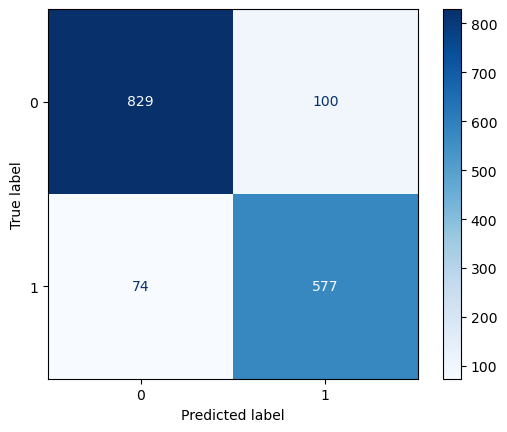

In [247]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='.3g')
plt.show()

In [249]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_gradient_Boost))

Mean Absolute Error:

0.056962025316455694


In [251]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_gradient_Boost)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.23866718525271902


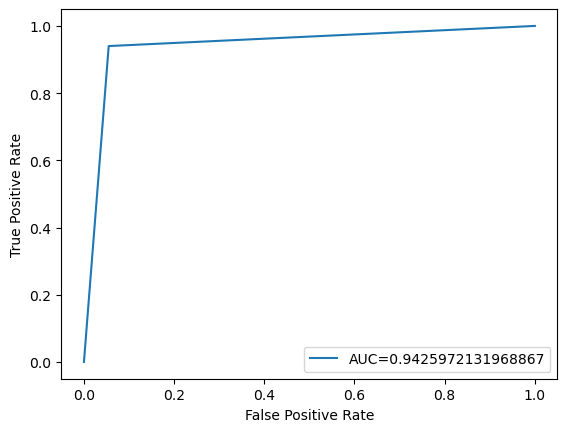

In [253]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_gradient_Boost)

auc = roc_auc_score(y_test, y_pred_gradient_Boost)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 3: Boosting (Extreme Gradient Boosting)

In [259]:
!pip install xgboost

In [261]:
from xgboost import XGBRegressor

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2]

for learning_rate in lr_list:
    
    start_time = time.time()
    
    xgb = XGBRegressor(n_estimators = 10000, learning_rate = learning_rate, max_depth = 5)
    xgb.fit(X_train, y_train)
    
    
    
    acc_xgb = xgb.score(X_train, y_train) * 100
    
    print('alpha', '=', learning_rate)

    print(f"Extreme Gradient Boost Train Accuracy {round(acc_xgb, 2)}%")
    
    y_pred_ex_gradient_Boost = xgb.predict(X_test)
    
    predictions = [round(value) for value in y_pred_ex_gradient_Boost]

    acc_gradient_Boost_test = accuracy_score(y_test, predictions) * 100

    print(f"Gradient Boost Test Accuracy {round(acc_gradient_Boost_test, 2)}%")
    
    end_time = time.time()
    print("Time taken for execution", (end_time - start_time), "seconds")
    
    print('-----------------------------------------------------------------------------')
    

alpha = 0.05
Extreme Gradient Boost Train Accuracy 99.96%
Gradient Boost Test Accuracy 93.54%
Time taken for execution 4.645336151123047 seconds
-----------------------------------------------------------------------------
alpha = 0.075
Extreme Gradient Boost Train Accuracy 99.97%
Gradient Boost Test Accuracy 93.67%
Time taken for execution 3.0626416206359863 seconds
-----------------------------------------------------------------------------
alpha = 0.1
Extreme Gradient Boost Train Accuracy 99.97%
Gradient Boost Test Accuracy 93.73%
Time taken for execution 2.774415969848633 seconds
-----------------------------------------------------------------------------
alpha = 0.25
Extreme Gradient Boost Train Accuracy 99.99%
Gradient Boost Test Accuracy 93.67%
Time taken for execution 2.0337982177734375 seconds
-----------------------------------------------------------------------------
alpha = 0.5
Extreme Gradient Boost Train Accuracy 99.99%
Gradient Boost Test Accuracy 93.23%
Time taken fo

In [263]:
# max test accuracy at:

# n_estimators = 10000
# alpha = 0.075

# So, finally:

xgb = XGBRegressor(n_estimators = 10000, learning_rate = 0.1, max_depth = 5)
xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [265]:
acc_xgb = xgb.score(X_train, y_train) * 100

print(f"Extreme Gradient Boost Train Accuracy {round(acc_xgb, 2)}%")

Extreme Gradient Boost Train Accuracy 99.97%


In [267]:
y_pred_ex_gradient_Boost = xgb.predict(X_test)

predictions = [round(value) for value in y_pred_ex_gradient_Boost]

acc_gradient_Boost_test = accuracy_score(y_test, predictions) * 100

print(f"Gradient Boost Test Accuracy {round(acc_gradient_Boost_test, 2)}%")

Gradient Boost Test Accuracy 93.73%


In [269]:
# Confusion Metrics 

# Top Left       (Predicted 1 and Actual 1 value)
# Top Right      (Predicted 1 and Actual 0 value)
# bottom Left    (Predicted 0 and Actual 1 value)
# bottom Left    (Predicted 0 and Actual 0 value)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ex_gradient_Boost.round())  


array([[  0,   0,   0],
       [  1, 875,  53],
       [  0,  45, 606]], dtype=int64)

In [271]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred_ex_gradient_Boost.round()))

Mean Absolute Error:

0.06265822784810127


In [273]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred_ex_gradient_Boost.round())
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.2503162556609164


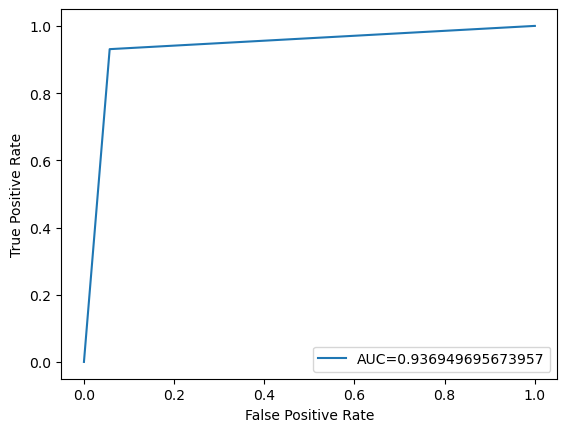

In [275]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test,  y_pred_ex_gradient_Boost.round())

auc = roc_auc_score(y_test, y_pred_ex_gradient_Boost.round())

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

## Method 4: Deep Neural Network

In [278]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# DEEP NEURAL NETWORK 2

In [283]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(5,)))        # Explicit input layer, 5 features
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [285]:
start_time = time.time()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 20, epochs = 600)

end_time = time.time()
print("Time taken for execution", (end_time - start_time), "seconds")

Epoch 1/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6006 - loss: 11.5412  
Epoch 2/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.6074 - loss: 8.7181
Epoch 3/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.6274 - loss: 4.6949
Epoch 4/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.5994 - loss: 5.2757
Epoch 5/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5997 - loss: 3.8940  
Epoch 6/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.6673 - loss: 1.8500
Epoch 7/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.6471 - loss: 2.7885
Epoch 8/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6425 - loss: 2.4640
Epoch 9/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.6419 - loss: 2.3782
Epoch 10/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7060 - loss: 1.3047
Epoch 11/600
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.6513 - loss: 1.9066
Epoch 12/600
316/3

316/316 [==============================] - 0s 774us/step - loss: 2.5562 - accuracy: 0.7841
Epoch 158/600
316/316 [==============================] - 0s 740us/step - loss: 2.3756 - accuracy: 0.7815
Epoch 159/600
316/316 [==============================] - 0s 741us/step - loss: 3.8879 - accuracy: 0.7531
Epoch 160/600
316/316 [==============================] - 0s 739us/step - loss: 2.4224 - accuracy: 0.7729
Epoch 161/600
316/316 [==============================] - 0s 749us/step - loss: 3.0392 - accuracy: 0.7577
Epoch 162/600
316/316 [==============================] - 0s 758us/step - loss: 2.7965 - accuracy: 0.7658
Epoch 163/600
316/316 [==============================] - 0s 721us/step - loss: 2.1971 - accuracy: 0.7897
Epoch 164/600
316/316 [==============================] - 0s 750us/step - loss: 3.6514 - accuracy: 0.7362
Epoch 165/600
316/316 [==============================] - 0s 809us/step - loss: 2.3202 - accuracy: 0.7720
Epoch 166/600
316/316 [==============================] - 0s 772us/ste

316/316 [==============================] - 0s 737us/step - loss: 0.4918 - accuracy: 0.8050
Epoch 236/600
316/316 [==============================] - 0s 751us/step - loss: 0.4641 - accuracy: 0.8153
Epoch 237/600
316/316 [==============================] - 0s 783us/step - loss: 0.4390 - accuracy: 0.8270
Epoch 238/600
316/316 [==============================] - 0s 743us/step - loss: 0.4946 - accuracy: 0.7985
Epoch 239/600
316/316 [==============================] - 0s 730us/step - loss: 0.4493 - accuracy: 0.8164
Epoch 240/600
316/316 [==============================] - 0s 722us/step - loss: 0.4698 - accuracy: 0.8125
Epoch 241/600
316/316 [==============================] - 0s 769us/step - loss: 0.4442 - accuracy: 0.8262
Epoch 242/600
316/316 [==============================] - 0s 740us/step - loss: 0.4249 - accuracy: 0.8310
Epoch 243/600
316/316 [==============================] - 0s 732us/step - loss: 0.4363 - accuracy: 0.8345
Epoch 244/600
316/316 [==============================] - 0s 734us/ste

316/316 [==============================] - 0s 793us/step - loss: 0.3721 - accuracy: 0.8427
Epoch 314/600
316/316 [==============================] - 0s 905us/step - loss: 0.3659 - accuracy: 0.8528
Epoch 315/600
316/316 [==============================] - 0s 869us/step - loss: 0.3722 - accuracy: 0.8448
Epoch 316/600
316/316 [==============================] - 0s 876us/step - loss: 0.3773 - accuracy: 0.8391
Epoch 317/600
316/316 [==============================] - 0s 871us/step - loss: 0.3658 - accuracy: 0.8511
Epoch 318/600
316/316 [==============================] - 0s 954us/step - loss: 0.3798 - accuracy: 0.8422
Epoch 319/600
316/316 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8417
Epoch 320/600
316/316 [==============================] - 0s 906us/step - loss: 0.3867 - accuracy: 0.8405
Epoch 321/600
316/316 [==============================] - 0s 945us/step - loss: 0.3838 - accuracy: 0.8351
Epoch 322/600
316/316 [==============================] - 0s 984us/step 

316/316 [==============================] - 0s 744us/step - loss: 0.3611 - accuracy: 0.8493
Epoch 392/600
316/316 [==============================] - 0s 749us/step - loss: 0.3526 - accuracy: 0.8511
Epoch 393/600
316/316 [==============================] - 0s 762us/step - loss: 0.3558 - accuracy: 0.8501
Epoch 394/600
316/316 [==============================] - 0s 788us/step - loss: 0.3517 - accuracy: 0.8542
Epoch 395/600
316/316 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8478
Epoch 396/600
316/316 [==============================] - 0s 742us/step - loss: 0.3534 - accuracy: 0.8497
Epoch 397/600
316/316 [==============================] - 0s 736us/step - loss: 0.3668 - accuracy: 0.8471
Epoch 398/600
316/316 [==============================] - 0s 923us/step - loss: 0.3618 - accuracy: 0.8452
Epoch 399/600
316/316 [==============================] - 0s 859us/step - loss: 0.3706 - accuracy: 0.8455
Epoch 400/600
316/316 [==============================] - 0s 893us/step 

316/316 [==============================] - 0s 747us/step - loss: 0.3651 - accuracy: 0.8459
Epoch 470/600
316/316 [==============================] - 0s 744us/step - loss: 0.3579 - accuracy: 0.8462
Epoch 471/600
316/316 [==============================] - 0s 733us/step - loss: 0.3528 - accuracy: 0.8576
Epoch 472/600
316/316 [==============================] - 0s 761us/step - loss: 0.3671 - accuracy: 0.8417
Epoch 473/600
316/316 [==============================] - 0s 852us/step - loss: 0.3532 - accuracy: 0.8525
Epoch 474/600
316/316 [==============================] - 0s 752us/step - loss: 0.3488 - accuracy: 0.8577
Epoch 475/600
316/316 [==============================] - 0s 839us/step - loss: 0.3608 - accuracy: 0.8482
Epoch 476/600
316/316 [==============================] - 0s 893us/step - loss: 0.3660 - accuracy: 0.8444
Epoch 477/600
316/316 [==============================] - 0s 914us/step - loss: 0.3583 - accuracy: 0.8522
Epoch 478/600
316/316 [==============================] - 0s 757us/ste

316/316 [==============================] - 0s 767us/step - loss: 0.3896 - accuracy: 0.8398
Epoch 548/600
316/316 [==============================] - 0s 784us/step - loss: 0.3936 - accuracy: 0.8413
Epoch 549/600
316/316 [==============================] - 0s 763us/step - loss: 0.3858 - accuracy: 0.8427
Epoch 550/600
316/316 [==============================] - 0s 740us/step - loss: 0.3943 - accuracy: 0.8387
Epoch 551/600
316/316 [==============================] - 0s 757us/step - loss: 0.3809 - accuracy: 0.8452
Epoch 552/600
316/316 [==============================] - 0s 750us/step - loss: 0.3848 - accuracy: 0.8424
Epoch 553/600
316/316 [==============================] - 0s 742us/step - loss: 0.3772 - accuracy: 0.8492
Epoch 554/600
316/316 [==============================] - 0s 756us/step - loss: 0.3977 - accuracy: 0.8372
Epoch 555/600
316/316 [==============================] - 0s 746us/step - loss: 0.3848 - accuracy: 0.8432
Epoch 556/600
316/316 [==============================] - 0s 777us/ste

In [287]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(accuracy_score(y_test, y_pred))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.5879746835443038


In [290]:
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(accuracy_score(y_train, y_pred_train))

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
0.5722424434245925


In [292]:
score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = 30)
print("score: %2f" % (score) )
print( "accuracy:", (acc)*100,"%")

53/53 - 0s - 3ms/step - accuracy: 0.5880 - loss: 0.6760
score: 0.675996
accuracy: 58.79746675491333 %


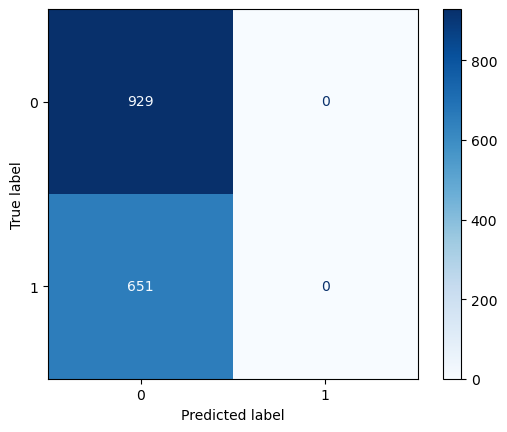

In [294]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)  

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()
# cm = confusion_matrix(y_test, y_pred)

# disp = keras.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# disp.plot(cmap=plt.cm.Blues)
# plt.show()

In [296]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test, y_pred))

Mean Absolute Error:

0.4120253164556962


In [298]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6418919819219556


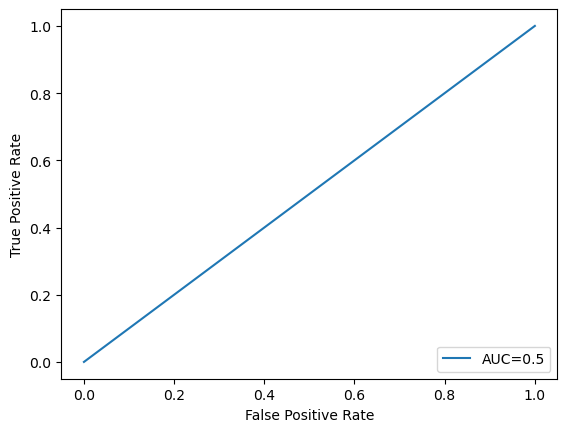

In [300]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = roc_curve(y_test, y_pred )

auc = roc_auc_score(y_test, y_pred )

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=4)
plt.show()

In [302]:
# from keras_visualizer import visualizer 
# visualizer(model, format='png', view=True, filename="DNN")

# QLattice Implementation

In [307]:
!pip install feyn

In [309]:
import feyn

This version of Feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at https://abzu.ai/eula.

## pre-processing data according to feyn

In [311]:
dataset.describe()

,Temperature,Humidity,CO2,Occupancy status,exact_time_object,Timestamp_numeric,week_status
count,7899.000000,7899.00000,7899.000000,7899.000000,7899,7899.000000,7899.000000
mean,28.353690,69.13408,683.416255,0.425117,2022-08-07 10:16:25.556905984,117339.647297,0.726548
min,22.300000,37.20000,454.000000,0.000000,2022-06-27 17:00:25,0.000000,0.000000
25%,27.300000,60.50000,541.000000,0.000000,2022-07-18 00:52:30,60000.000000,0.000000
50%,28.500000,73.40000,617.000000,0.000000,2022-08-07 07:30:00,114500.000000,1.000000
75%,29.500000,77.90000,776.000000,1.000000,2022-08-27 21:07:30,180000.000000,1.000000
max,32.900000,90.60000,2224.000000,1.000000,2022-09-17 10:45:00,234500.000000,1.000000
std,1.751652,11.94271,198.108790,0.494392,NaN,69209.699449,0.445759


In [313]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object,Timestamp_numeric,week_status
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25,170025,1
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32,170132,1
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00,171500,1
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22,172222,1
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22,172622,1


In [315]:
data_ql = dataset.drop(['exact_time', 'Location', 'Timestamp', 'exact_time_object'], axis = 1)


In [317]:
data_ql.head(20)

,Temperature,Humidity,CO2,Occupancy status,Timestamp_numeric,week_status
0,28.9,48.9,1168,0,170025,1
1,29.1,45.9,1150,0,170132,1
2,28.4,42.5,1141,0,171500,1
3,29.9,43.3,1138,0,172222,1
4,28.9,41.5,1135,0,172622,1
5,27.7,42.6,1133,0,173000,1
6,26.7,44.7,1132,0,173121,1
7,26.4,44.1,1188,0,173449,1
8,25.6,46.5,1128,0,174059,1
9,25.4,46.3,1194,1,174500,1


In [319]:
train_ql, test_ql = train_test_split(data_ql, random_state=42, train_size=0.7)

In [321]:
target = 'Occupancy status'

ql = feyn.QLattice()
# ql.reset(random_seed=1)

## Try 2: more epoch value = 200

In [324]:
# start_time = time.time()

models = ql.auto_run(
    data=train_ql,
    output_name= target,
    n_epochs=200,
    loss_function = 'squared_error'
)

best = models[0]

# end_time = time.time()
# print("Time taken for execution", (end_time - start_time), "seconds")

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="308.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 981 308.0" width="981" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="215.0" width="711" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="601" y="80.0"><title>Occupancy status
logistic:
w=-7.0929
bias=0.1188</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="101.5">Occupanc..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="89.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="603" y="89.0">logistic</text><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">1</text><line stroke="#1E1E1E" x1="451" x2="481" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="127.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="50.0"><title>week_status
linear:
scale=2.000000
scale offset=0.724905
w=0.081893
bias=0.6772</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">week_sta..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="59.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="110.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="131.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="119.0">3</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="118.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="127.5" y2="136.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>tanh</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">tanh</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">4</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>log</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">log</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">5</text><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="37.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>CO2
linear:
scale=0.001130
scale offset=684.241997
w=-4.356397
bias=0.0151</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">CO2</text><text fill="#1E1E1E" font-family=
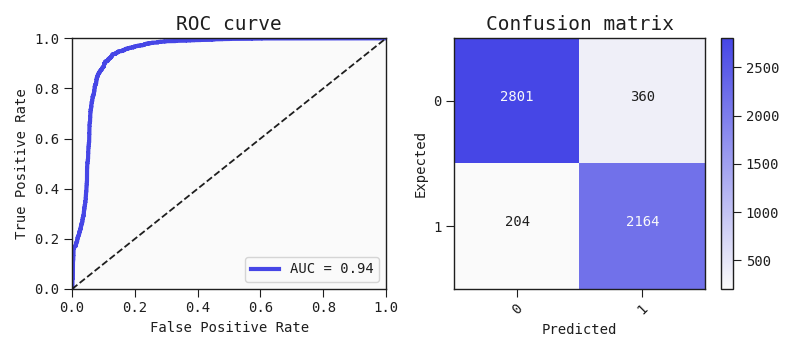
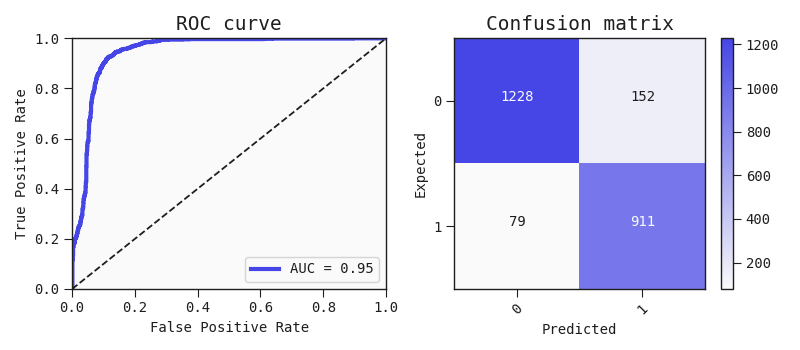

In [326]:
best.plot(train_ql, test_ql)

In [328]:
pred_ql_test = best.predict(test_ql)
for i in pred_ql_test:
    round(i)
    
np.round(pred_ql_test)

array([0., 1., 0., ..., 1., 0., 1.])

In [330]:
best.interactive_response_1d(
    data = train_ql,
    input_constraints = {'Occupancy status':train_ql.quantile(0.25)}
)

interactive(children=(Dropdown(description='by', options=('week_status', 'Humidity', 'Timestamp_numeric', 'CO2…

In [332]:
best.plot_signal(train_ql, filename="feyn-signal-plot.svg")

'C:\\Users\\Asus\\feyn-signal-plot.svg'

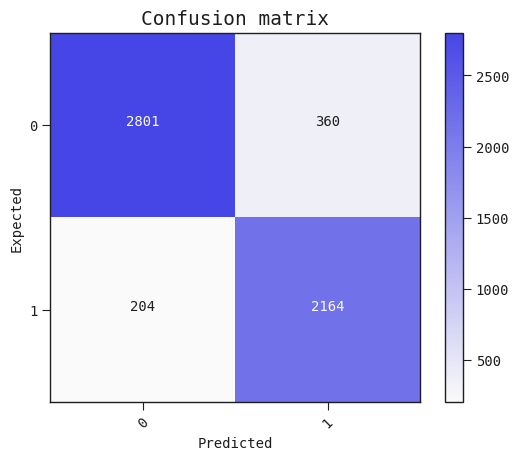

In [334]:
best.plot_confusion_matrix(train_ql, threshold=0.5)


In [336]:
print('accuracy score:', ((2817+2156)/(2817+2156+212+344)*100), '%')

accuracy score: 89.9439319949358 %


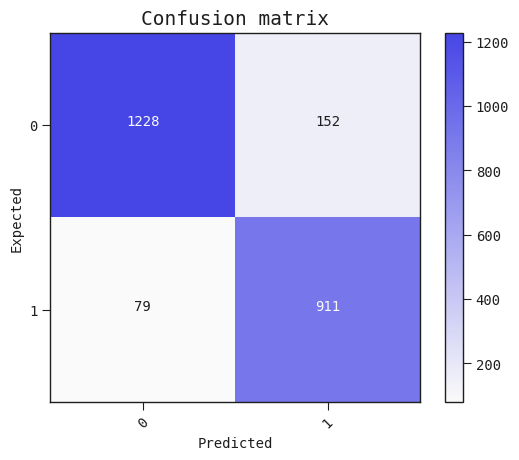

In [338]:
best.plot_confusion_matrix(test_ql, threshold=0.5)

In [340]:
print('accuracy score:', ((1231+902)/(1231+902+149+88)*100), '%')

accuracy score: 90.0 %


In [342]:
print(type(y_test))
print(type(np.round(pred_ql_test)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [344]:
from feyn.plots import plot_roc_curve

y_true = train_ql['Occupancy status']
y_pred = np.round(best.predict(train_ql))

# plot_roc_curve(y_true, y_pred)

<Axes: title={'center': 'ROC curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

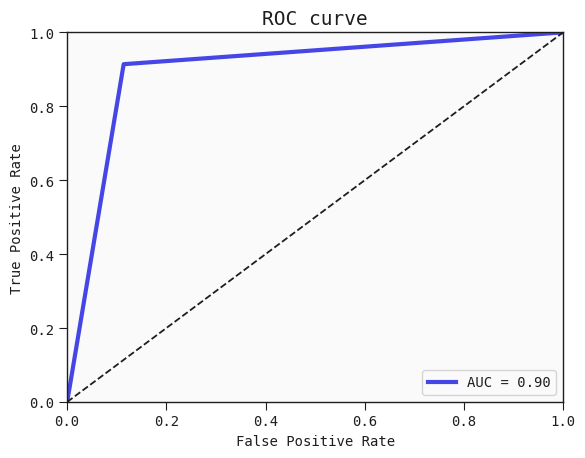

In [346]:
plot_roc_curve(y_true, y_pred)

In [348]:
"""

Things left to do:

4) predict CO2 with SVM, XGBoost, Decision Trees and ANN

"""

'\n\nThings left to do:\n\n4) predict CO2 with SVM, XGBoost, Decision Trees and ANN\n\n'

In [350]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object,Timestamp_numeric,week_status
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25,170025,1
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32,170132,1
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00,171500,1
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22,172222,1
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22,172622,1


# Correlation Plot

In [355]:
numeric_dataset = dataset.select_dtypes(include=['number'])
print(numeric_dataset.corr())

                   Temperature  Humidity       CO2  Occupancy status  \
Temperature           1.000000  0.436462 -0.466421         -0.449639   
Humidity              0.436462  1.000000 -0.490494         -0.470517   
CO2                  -0.466421 -0.490494  1.000000          0.604598   
Occupancy status     -0.449639 -0.470517  0.604598          1.000000   
Timestamp_numeric    -0.196188 -0.317468  0.273585          0.424556   
week_status          -0.233429 -0.208990  0.176104          0.105858   

                   Timestamp_numeric  week_status  
Temperature                -0.196188    -0.233429  
Humidity                   -0.317468    -0.208990  
CO2                         0.273585     0.176104  
Occupancy status            0.424556     0.105858  
Timestamp_numeric           1.000000     0.011828  
week_status                 0.011828     1.000000  


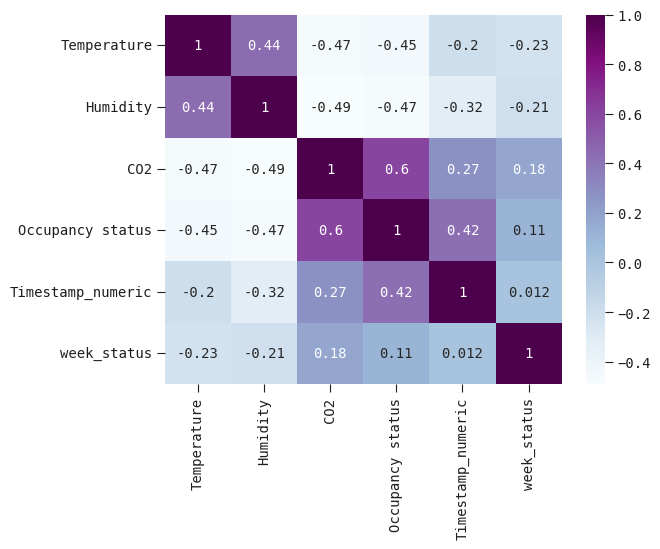

In [359]:
import seaborn as sb
import matplotlib.pyplot as plt

# Select only numeric columns for correlation computation
numeric_dataset = dataset.select_dtypes(include=['number'])

dataplot = sb.heatmap(numeric_dataset.corr(), cmap="BuPu", annot=True)

plt.show()

# PREDICTION OF CO2

In [362]:
dataset.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,exact_time,exact_time_object,Timestamp_numeric,week_status
0,27-06-2022,17:00:25,28.9,48.9,1168,0,27-06-2022 17:00:25,2022-06-27 17:00:25,170025,1
1,27-06-2022,17:01:32,29.1,45.9,1150,0,27-06-2022 17:01:32,2022-06-27 17:01:32,170132,1
2,27-06-2022,17:15:00,28.4,42.5,1141,0,27-06-2022 17:15:00,2022-06-27 17:15:00,171500,1
3,27-06-2022,17:22:22,29.9,43.3,1138,0,27-06-2022 17:22:22,2022-06-27 17:22:22,172222,1
4,27-06-2022,17:26:22,28.9,41.5,1135,0,27-06-2022 17:26:22,2022-06-27 17:26:22,172622,1


## Making a training and a testing set for CO2

In [365]:
# creating dependant (Y or CO2 level) and independant variables (X) 

X_co2 = dataset.drop(['CO2', 'Location', 'Timestamp' , 'exact_time_object', 'exact_time'], axis = 1)
y_co2 = dataset['CO2']

In [367]:
X_co2.head(50)

,Temperature,Humidity,Occupancy status,Timestamp_numeric,week_status
0,28.9,48.9,0,170025,1
1,29.1,45.9,0,170132,1
2,28.4,42.5,0,171500,1
3,29.9,43.3,0,172222,1
4,28.9,41.5,0,172622,1
5,27.7,42.6,0,173000,1
6,26.7,44.7,0,173121,1
7,26.4,44.1,0,173449,1
8,25.6,46.5,0,174059,1
9,25.4,46.3,1,174500,1


In [369]:
y_co2.head(50)

0     1168
1     1150
2     1141
3     1138
4     1135
5     1133
6     1132
7     1188
8     1128
9     1194
10    1139
11    1137
12     971
13    1006
14    1133
15    1097
16     997
17    1026
18    1028
19    1098
20    1074
21    1042
22    1024
23    1007
24     991
25     979
26     965
27     950
28     938
29     923
30     913
31     923
32     945
33     959
34     961
35     959
36     947
37     946
38     945
39     940
40     922
41     903
42     882
43     852
44     828
45     777
46     719
47     691
48     660
49     628
Name: CO2, dtype: int64

In [371]:
## splitting dataset to predict CO2 in testing and training

from sklearn.model_selection import train_test_split

training_data_ratio = 0.8
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split (X_co2, y_co2, train_size = training_data_ratio, random_state = 29 )

In [373]:
X_test_co2.head(20)

,Temperature,Humidity,Occupancy status,Timestamp_numeric,week_status
656,28.1,78.0,0,71500,1
4368,24.9,44.2,1,161500,1
1901,28.4,87.8,1,63000,0
3468,29.6,74.8,0,81500,1
5888,31.0,73.7,0,121500,0
6835,30.3,76.9,0,90000,1
7598,27.8,81.8,0,74500,1
2004,29.0,84.6,1,81500,1
6968,26.6,65.7,1,181500,1
4762,27.3,56.1,1,184500,1


## DECISION TREES - CO2 PREDICTION

In [376]:
# load decision tree
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc_co2 = DecisionTreeClassifier()

# fit the model to the training data
dtc_co2.fit(X_train_co2, y_train_co2)

 


DecisionTreeClassifier()

In [378]:
# accuracy score for training
acc_dtc_co2 = dtc_co2.score(X_train_co2, y_train_co2) * 100

print(f"Decision Tree Train Accuracy {round(acc_dtc_co2, 2)}%")

Decision Tree Train Accuracy 99.92%


In [380]:
# predict the response for the test dataset

y_pred_dtc_co2 = dtc_co2.predict(X_test_co2)



In [382]:
# print accuracy_score for the testing
from sklearn.metrics import accuracy_score

acc_dtc_test_co2 = accuracy_score(y_test_co2, y_pred_dtc_co2) * 100

print(f"Decision Tree Test Accuracy {round(acc_dtc_test_co2, 2)}%")


Decision Tree Test Accuracy 3.23%


In [384]:
# MAE

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:\n")

print(mean_absolute_error(y_test_co2, y_pred_dtc_co2))

Mean Absolute Error:

78.5386075949367


In [386]:
# RMSE

from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test_co2, y_pred_dtc_co2)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

157.20619572613398


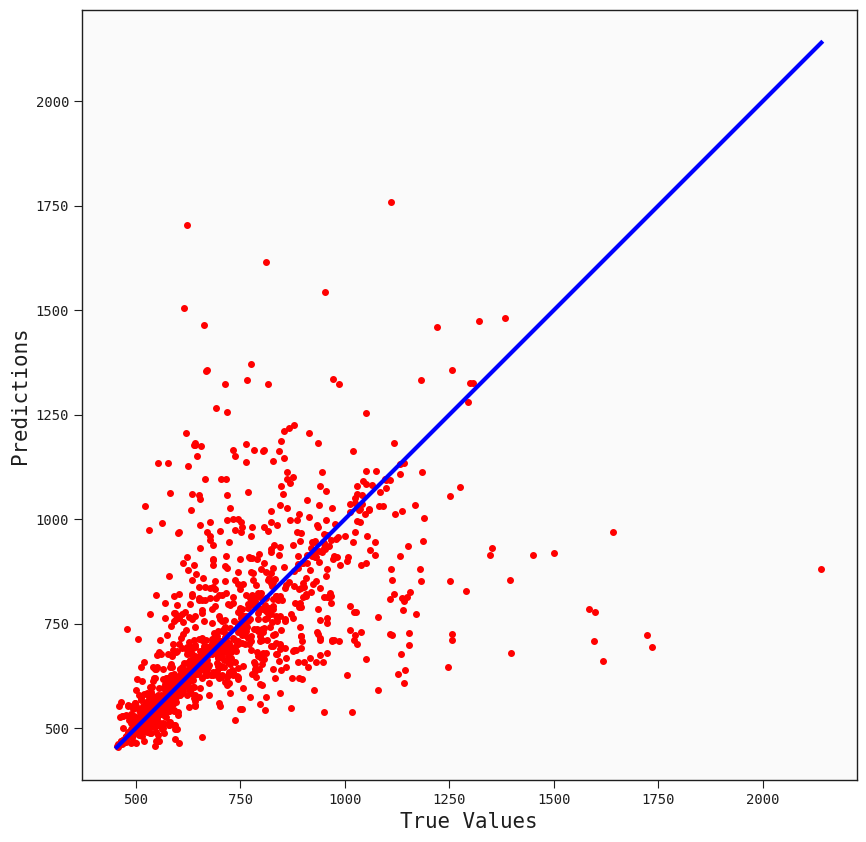

In [388]:
# printing a scatter plot

plt.figure(figsize=(10,10))
plt.scatter(y_test_co2, y_pred_dtc_co2, c='red')

p1 = max(max(y_pred_dtc_co2), max(y_test_co2))
p2 = min(min(y_pred_dtc_co2), min(y_test_co2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [390]:
y_test_co2.head(2)

656     555
4368    736
Name: CO2, dtype: int64

In [392]:
np.shape(y_test_co2)

(1580,)

In [394]:
np.shape(X_test_co2)

(1580, 5)